In [1]:
import statistics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from collections import OrderedDict
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#THE CODE IN THIS JUPYTER NOTEBOOK CLASSIFIES HAND WRITTEN DIGITS
trainingData = pd.read_csv('mnist_train.csv')
trainingData.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[4932 5678 4968 5101 4858 4506 4951 5175 4841 4988]


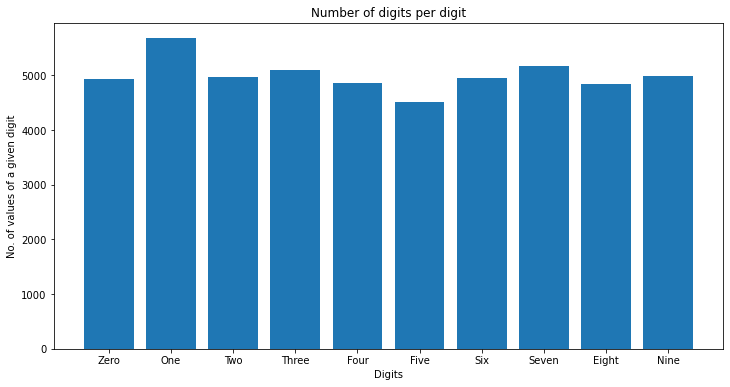

In [2]:
#getting label column
trainingLabel = np.array([trainingData['label'].values])
trainingLabelTrans = np.transpose(trainingLabel)
#dropped label column
trainingData.drop('label', inplace=True, axis=1)
training = trainingData.to_numpy()

#normalized the image data
trainingNormal = preprocessing.normalize(training)
trainingLableFinal = np.zeros((trainingLabelTrans.shape[0], 10))
trainingHistogram = np.zeros((10), dtype=int)
#print(trainingLabelTrans.shape[0])

#for loop sets each value that is equal to 1 as 1 in lable array, every 2 as 2 and so forth
for i in range(trainingLabelTrans.shape[0]):
    trainingLableFinal[i][trainingLabelTrans[i]] =  1
    trainingHistogram[trainingLabelTrans[i]] = trainingHistogram[trainingLabelTrans[i]] + 1
print(trainingHistogram)

plt.figure(figsize = (12, 6))
plt.title('Number of digits per digit')
plt.bar(['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'],
        trainingHistogram)
plt.xlabel("Digits")
plt.ylabel("No. of values of a given digit")
plt.show()

In [3]:
testingData = pd.read_csv('mnist_test.csv')
testingData.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[ 980 1135 1032 1010  982  892  958 1028  974 1009]


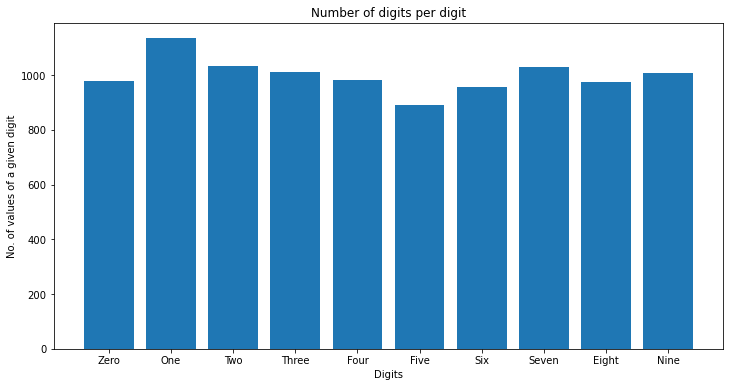

In [4]:
#getting label column
testingLabel = np.array([testingData['label'].values])
testignLabelTrans = np.transpose(testingLabel)

#dropped label column
testingData.drop('label', inplace=True, axis=1)
testing = testingData.to_numpy()

#normalized the image data
testingNormal = preprocessing.normalize(testing)
testingLabelFinal = np.zeros((testignLabelTrans.shape[0], 10))
testingHistogram = np.zeros((10), dtype=int)

#for loop sets each value that is equal to 1 as 1 in lable array, every 2 as 2 and so forth
for i in range(testignLabelTrans.shape[0]):
    testingLabelFinal[i][testignLabelTrans[i]] = 1
    testingHistogram[testignLabelTrans[i]] = testingHistogram[testignLabelTrans[i]] + 1
#histogram for actual number distribution
print(testingHistogram)

plt.figure(figsize = (12, 6))
plt.title('Number of digits per digit')
plt.bar(['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'],
        testingHistogram)
plt.xlabel("Digits")
plt.ylabel("No. of values of a given digit")
plt.show()

In [5]:
class NeuralNetwork():
    def __init__(self, numInputs=10, hiddenLayers=[3, 2, 3], numOutputs=1):
        self.numInputs = numInputs
        self.hiddenLayers = hiddenLayers
        self.numOutputs = numOutputs
        layers = [numInputs] + hiddenLayers + [numOutputs]
        #create empty activations per layer
        activations = []
        for i in range(len(layers)):
            activation = np.zeros(layers[i])
            activations.append(activation)
        self.activations = activations
        #create random weights per layer
        weights = []
        for i in range(len(layers) - 1):
            weight = np.random.rand(layers[i], layers[i + 1])
            weights.append(weight)
        self.weights = weights
        #create empty derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            derivative = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(derivative)
        self.derivatives = derivatives

    def feedForward(self, inputs):
        #first activation is imput layer
        activations = inputs
        self.activations[0] = inputs
        #iterate through network layers
        for i in range(len(self.weights)):
            #calculate dot product between previous activation and weight matrix
            totalInputs = np.dot(activations, self.weights[i])
            #print("{} {}".format(i, totalInputs)))
            activations = self.sigmoid(totalInputs)
            #print("{} {}".format(i, activations)))
            #save the activations for backpropogation
            self.activations[i + 1] = activations
        #return last activation value
        return activations

    def backProp(self, error):
        for i in reversed(range(len(self.derivatives))):
            #get activation for previous layer
            activations = self.activations[i+1]
            delta = error * self.sigmoidDerivative(activations)
            #reshape delta as to have it as a 2d array
            deltaReshape = delta.reshape(delta.shape[0], -1).T
            currActivations = self.activations[i]
            currActivations = currActivations.reshape(currActivations.shape[0],-1)
            self.derivatives[i] = np.dot(currActivations, deltaReshape)
            #go to next error
            error = np.dot(delta, self.weights[i].T)
    
    def train(self, inputs, targets, epochs, learningRate):
        cost = []
        for i in range(epochs):
            sumOfErrors = 0
            #goes through all the training data
            for j in range(len(inputs)):
                target = targets[j]
                output = self.feedForward(inputs[j])
                error = target - output
                self.backProp(error)
                #stochastic gradient descent
                self.gradientDescent(learningRate)
                sumOfErrors += self.meanSquareError(target, output)
            print("Error: {} at epoch {}".format(sumOfErrors/trainingNormal.shape[0], i+1))
            cost.append(sumOfErrors/trainingNormal.shape[0])
        plt.plot(cost)
        plt.title('Cost over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.show()
        
    def feedForwardTanh(self, inputs):
        #first activation is imput layer
        activations = inputs
        self.activations[0] = inputs
        #iterate through network layers
        for i in range(len(self.weights)):
            #calculate dot product between previous activation and weight matrix
            totalInputs = np.dot(activations, self.weights[i])
            #print("{} {}".format(i, totalInputs)))
            activations = self.tanh(totalInputs)
            #print("{} {}".format(i, activations)))
            #save the activations for backpropogation
            self.activations[i + 1] = activations
        #return last activation value
        return activations
    
    def backPropTanh(self, error):
        for i in reversed(range(len(self.derivatives))):
            #get activation for previous layer
            activations = self.activations[i+1]
            delta = error * self.tanhDerivative(activations)
            #reshape delta as to have it as a 2d array
            deltaReshape = delta.reshape(delta.shape[0], -1).T 
            currActivations = self.activations[i]
            currActivations = currActivations.reshape(currActivations.shape[0],-1)
            self.derivatives[i] = np.dot(currActivations, deltaReshape)
            #go to next error
            error = np.dot(delta, self.weights[i].T)
    
    def trainTanh(self, inputs, targets, epochs, learningRate):
        cost = []
        for i in range(epochs):
            sumOfErrors = 0
            #goes through all the training data
            for j in range(len(inputs)):
                target = targets[j]
                output = self.feedForwardTanh(inputs[j])
                error = target - output
                self.backPropTanh(error)
                #stochastic gradient descent
                self.gradientDescent(learningRate)
                sumOfErrors += self.meanSquareError(target, output)
            print("Error: {} at epoch {}".format(sumOfErrors / trainingNormal.shape[0], i+1))
            cost.append(sumOfErrors/trainingNormal.shape[0])
        plt.plot(cost)
        plt.title('Error over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.show()
           
    
    def gradientDescent(self, learningRate=1):
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate
            
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoidDerivative(self, x):
        return x * (1.0 - x)
    
    def elu(self, x):
        alpha = 0.1
        return x.all() if x.all() >= 0 else alpha*(np.exp(x) -1)
    
    def eluDerivative(self, x):
        alpha = 0.1
        return 1 if x.all() > 0 else alpha*np.exp(x)
    
    def tanh(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    
    def tanhDerivative(self, x):
        return 1 - np.power(np.tanh(x), 2)
    
    def meanSquareError(self, target, output):
        return np.average((target - output) ** 2) 

Error: 0.09481368700285443 at epoch 1
Error: 0.08579530782224744 at epoch 2
Error: 0.07977277330923428 at epoch 3
Error: 0.0736362172556818 at epoch 4
Error: 0.06533239781071985 at epoch 5
Error: 0.0586871469074426 at epoch 6
Error: 0.055795453190247674 at epoch 7
Error: 0.04418155441421186 at epoch 8
Error: 0.03430497572554992 at epoch 9
Error: 0.029870154734322817 at epoch 10
Error: 0.027969015507709843 at epoch 11
Error: 0.026742734543877572 at epoch 12
Error: 0.02579535794609968 at epoch 13
Error: 0.024510504030165595 at epoch 14
Error: 0.02298177629608791 at epoch 15
Error: 0.0218356965632841 at epoch 16
Error: 0.02104956952806868 at epoch 17
Error: 0.020462337779131635 at epoch 18
Error: 0.019991910700366117 at epoch 19
Error: 0.01960317576142561 at epoch 20


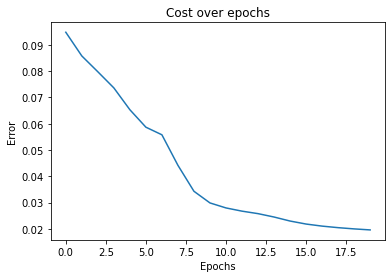

In [6]:
#neural network with 1 hidden layer, 10 neurons and 10 output neurons
NN = NeuralNetwork(training.shape[1], [10], 10)
#each row represents a data point and each column a feature
NN.train(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9
output = NN.feedForward(testingNormal)

print()
#getting confusion matrix
arr = confusion_matrix(testingLabelFinal.argmax(axis=1), output.argmax(axis=1))

In [7]:
def accuracy(testY, predY):
    accuracy = 0
    for i in range(len(predY)):
        if testY[i].argmax(axis=0) == predY[i].argmax(axis=0):
            accuracy = accuracy + 1
            #print(testingLabelFinal[i].argmax(axis=0))
    return (accuracy/len(predY))*100
accuracyValue = accuracy(testingLabelFinal,output)
print("Accuracy: {} %".format(accuracyValue))

Accuracy: 88.53 %


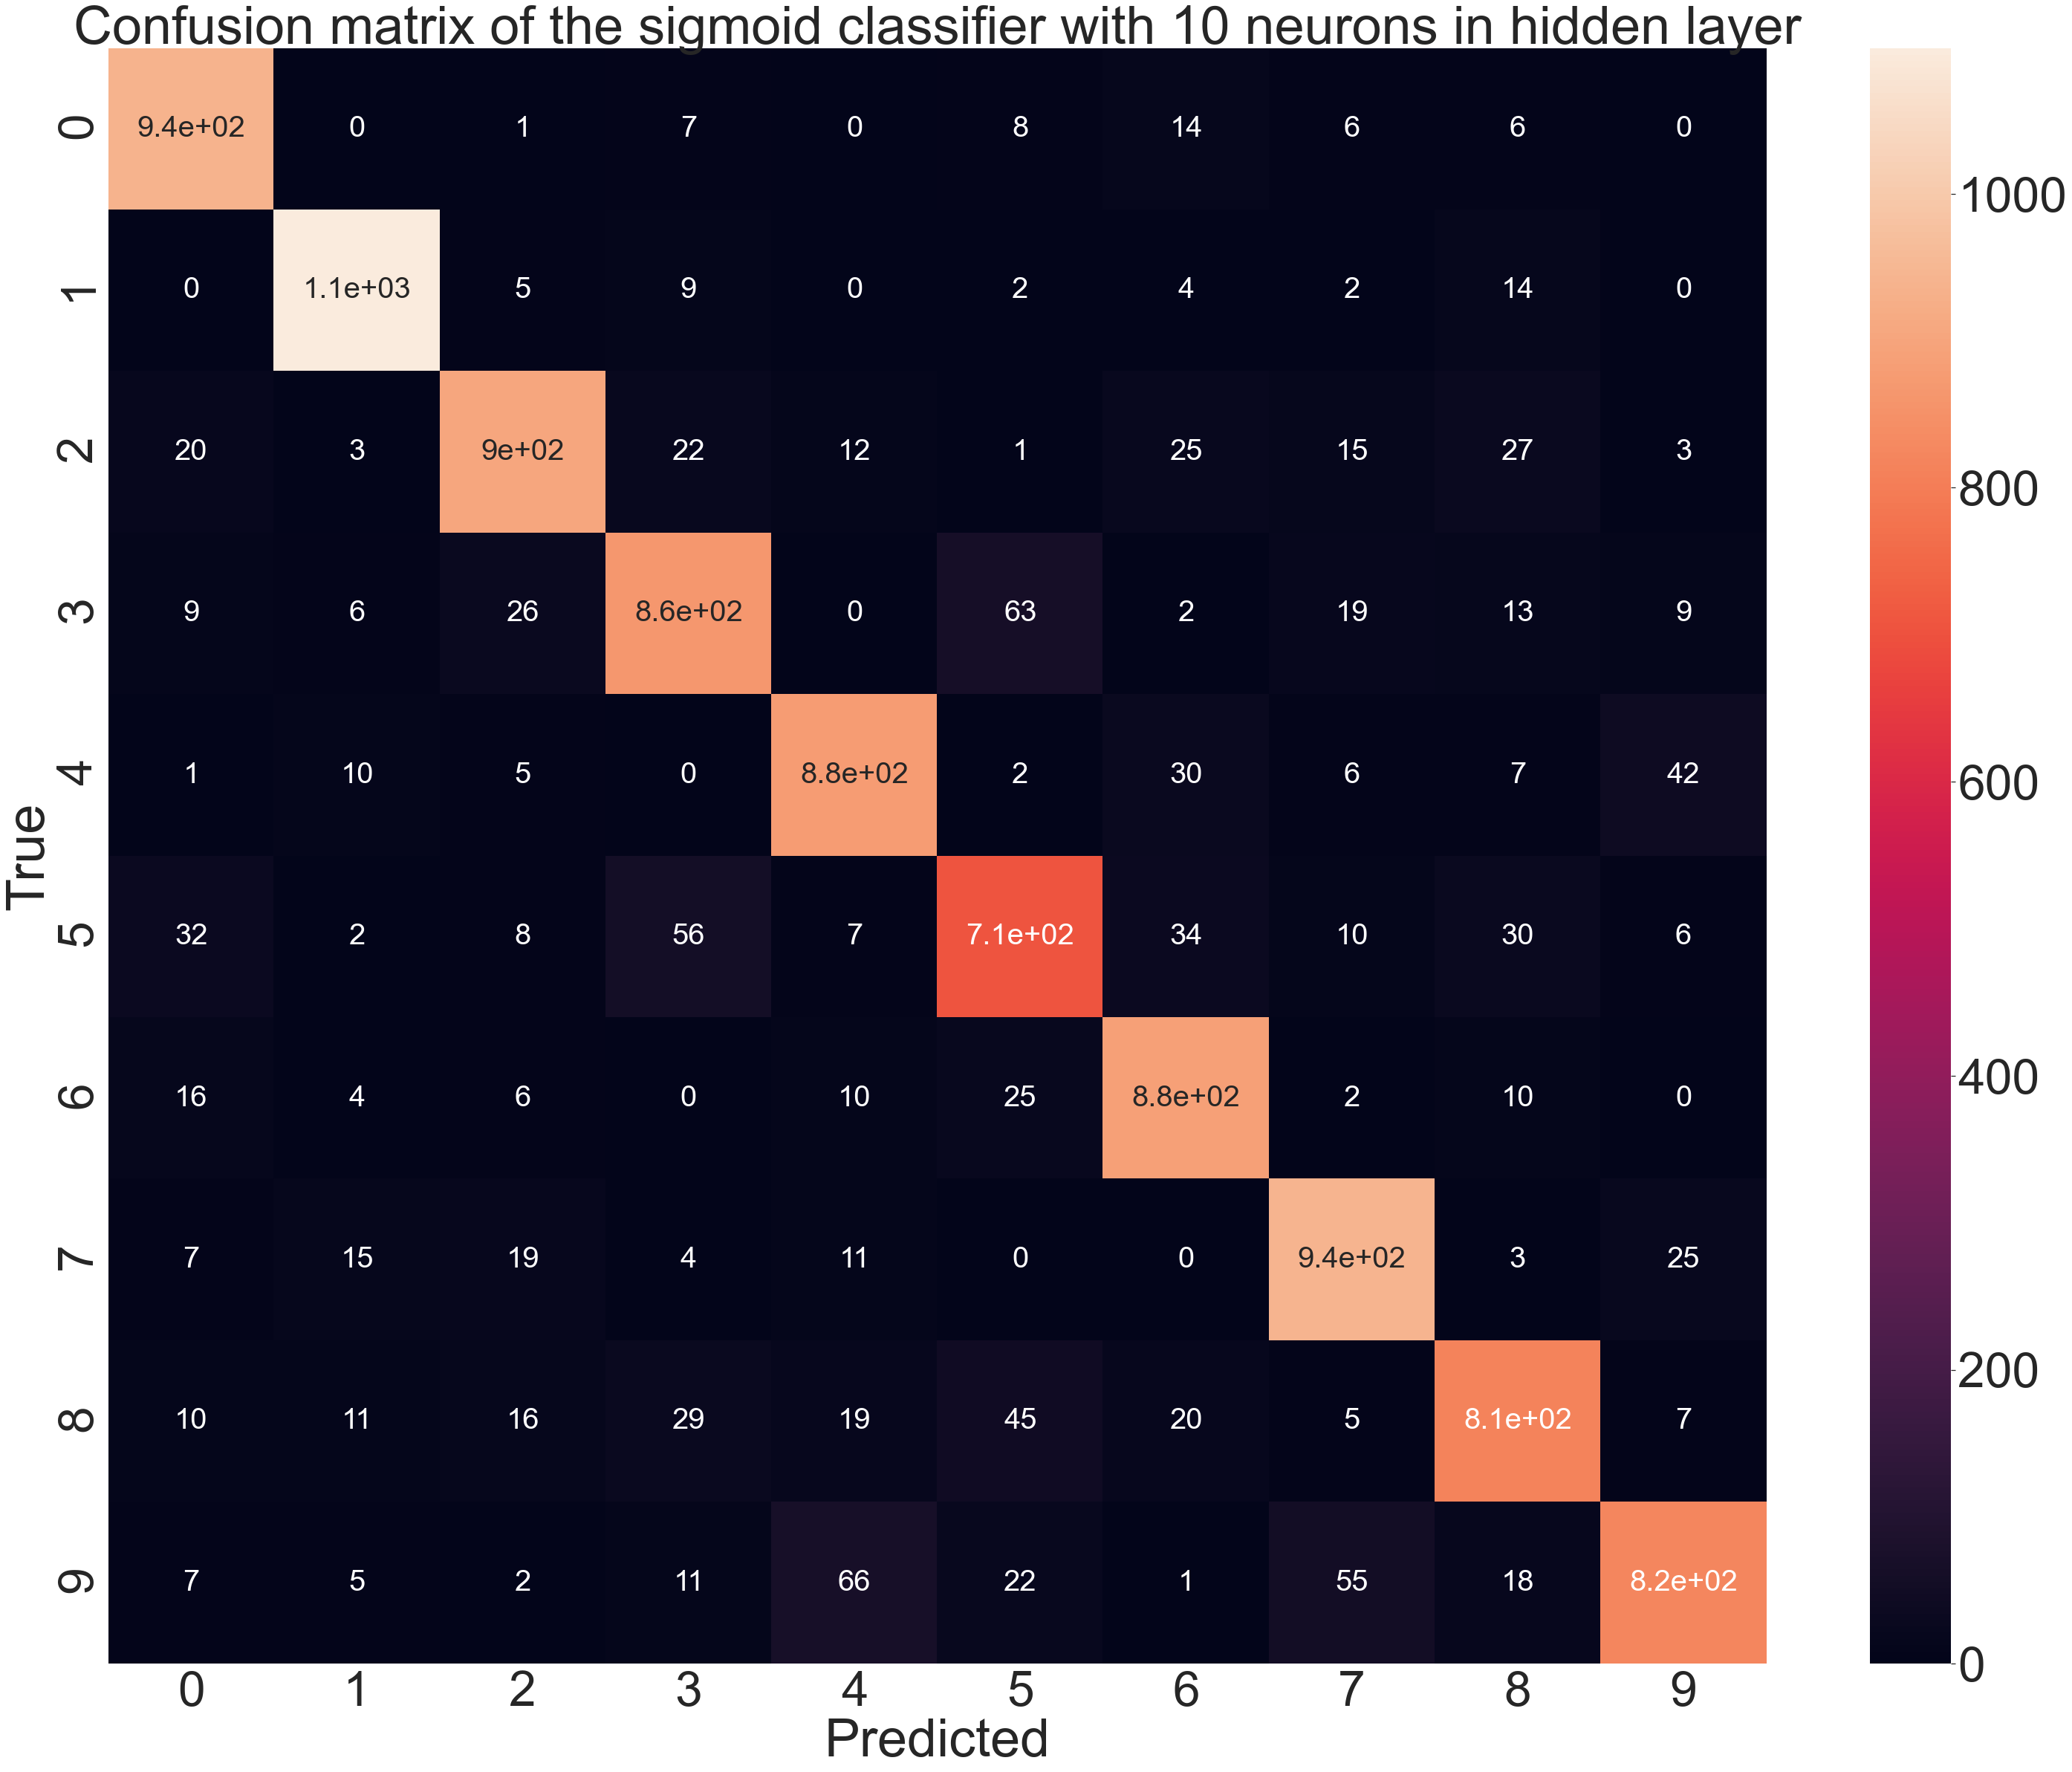

Sigmoid: ROC AUC=0.977
[[ 938    0    1    7    0    8   14    6    6    0]
 [   0 1099    5    9    0    2    4    2   14    0]
 [  20    3  904   22   12    1   25   15   27    3]
 [   9    6   26  863    0   63    2   19   13    9]
 [   1   10    5    0  879    2   30    6    7   42]
 [  32    2    8   56    7  707   34   10   30    6]
 [  16    4    6    0   10   25  885    2   10    0]
 [   7   15   19    4   11    0    0  944    3   25]
 [  10   11   16   29   19   45   20    5  812    7]
 [   7    5    2   11   66   22    1   55   18  822]]


In [8]:
df_cm = pd.DataFrame(arr, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the sigmoid classifier with 10 neurons in hidden layer')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

auc = roc_auc_score(testingLabelFinal, output)
#summarize scores
print('Sigmoid: ROC AUC=%.3f' % (auc))

print(arr)

Error: 0.4097744127120256 at epoch 1
Error: 0.24627240070529233 at epoch 2
Error: 0.24066390126417492 at epoch 3
Error: 0.23355734088307345 at epoch 4
Error: 0.14826756163376356 at epoch 5
Error: 0.12463084324793408 at epoch 6
Error: 0.0398151050890655 at epoch 7
Error: 0.03281037666714615 at epoch 8
Error: 0.02824533567926324 at epoch 9
Error: 0.024218012237217215 at epoch 10
Error: 0.021653389484010556 at epoch 11
Error: 0.01961069863131818 at epoch 12
Error: 0.01803779232519605 at epoch 13
Error: 0.016882597523048673 at epoch 14
Error: 0.016067224945541424 at epoch 15
Error: 0.015471097391402766 at epoch 16
Error: 0.01500638078219979 at epoch 17
Error: 0.01462616272655159 at epoch 18
Error: 0.014307027973593095 at epoch 19
Error: 0.014035158467931337 at epoch 20


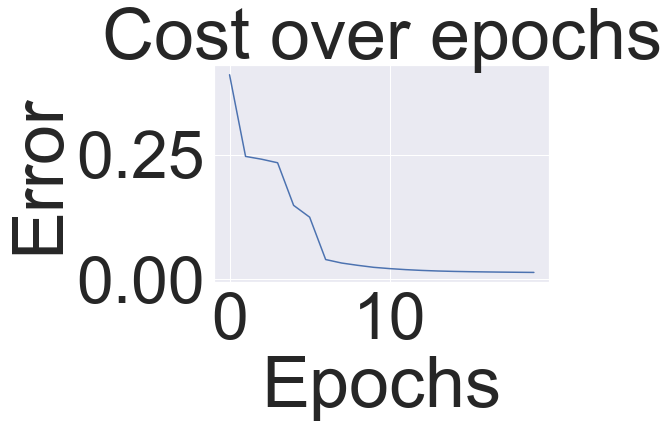

In [9]:
#neural network with 1 hidden layer, 20 neurons and 10 output neurons
NN20 = NeuralNetwork(training.shape[1], [20], 10)
#each row represents a data point and each column a feature
NN20.train(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9
output20 = NN20.feedForward(testingNormal)

print()
#getting confusion matrix
arr20 = confusion_matrix(testingLabelFinal.argmax(axis=1), output20.argmax(axis=1))

In [10]:
accuracyValue20 = accuracy(testingLabelFinal,output20)
print("Accuracy: {} %".format(accuracyValue20))

Accuracy: 92.15 %


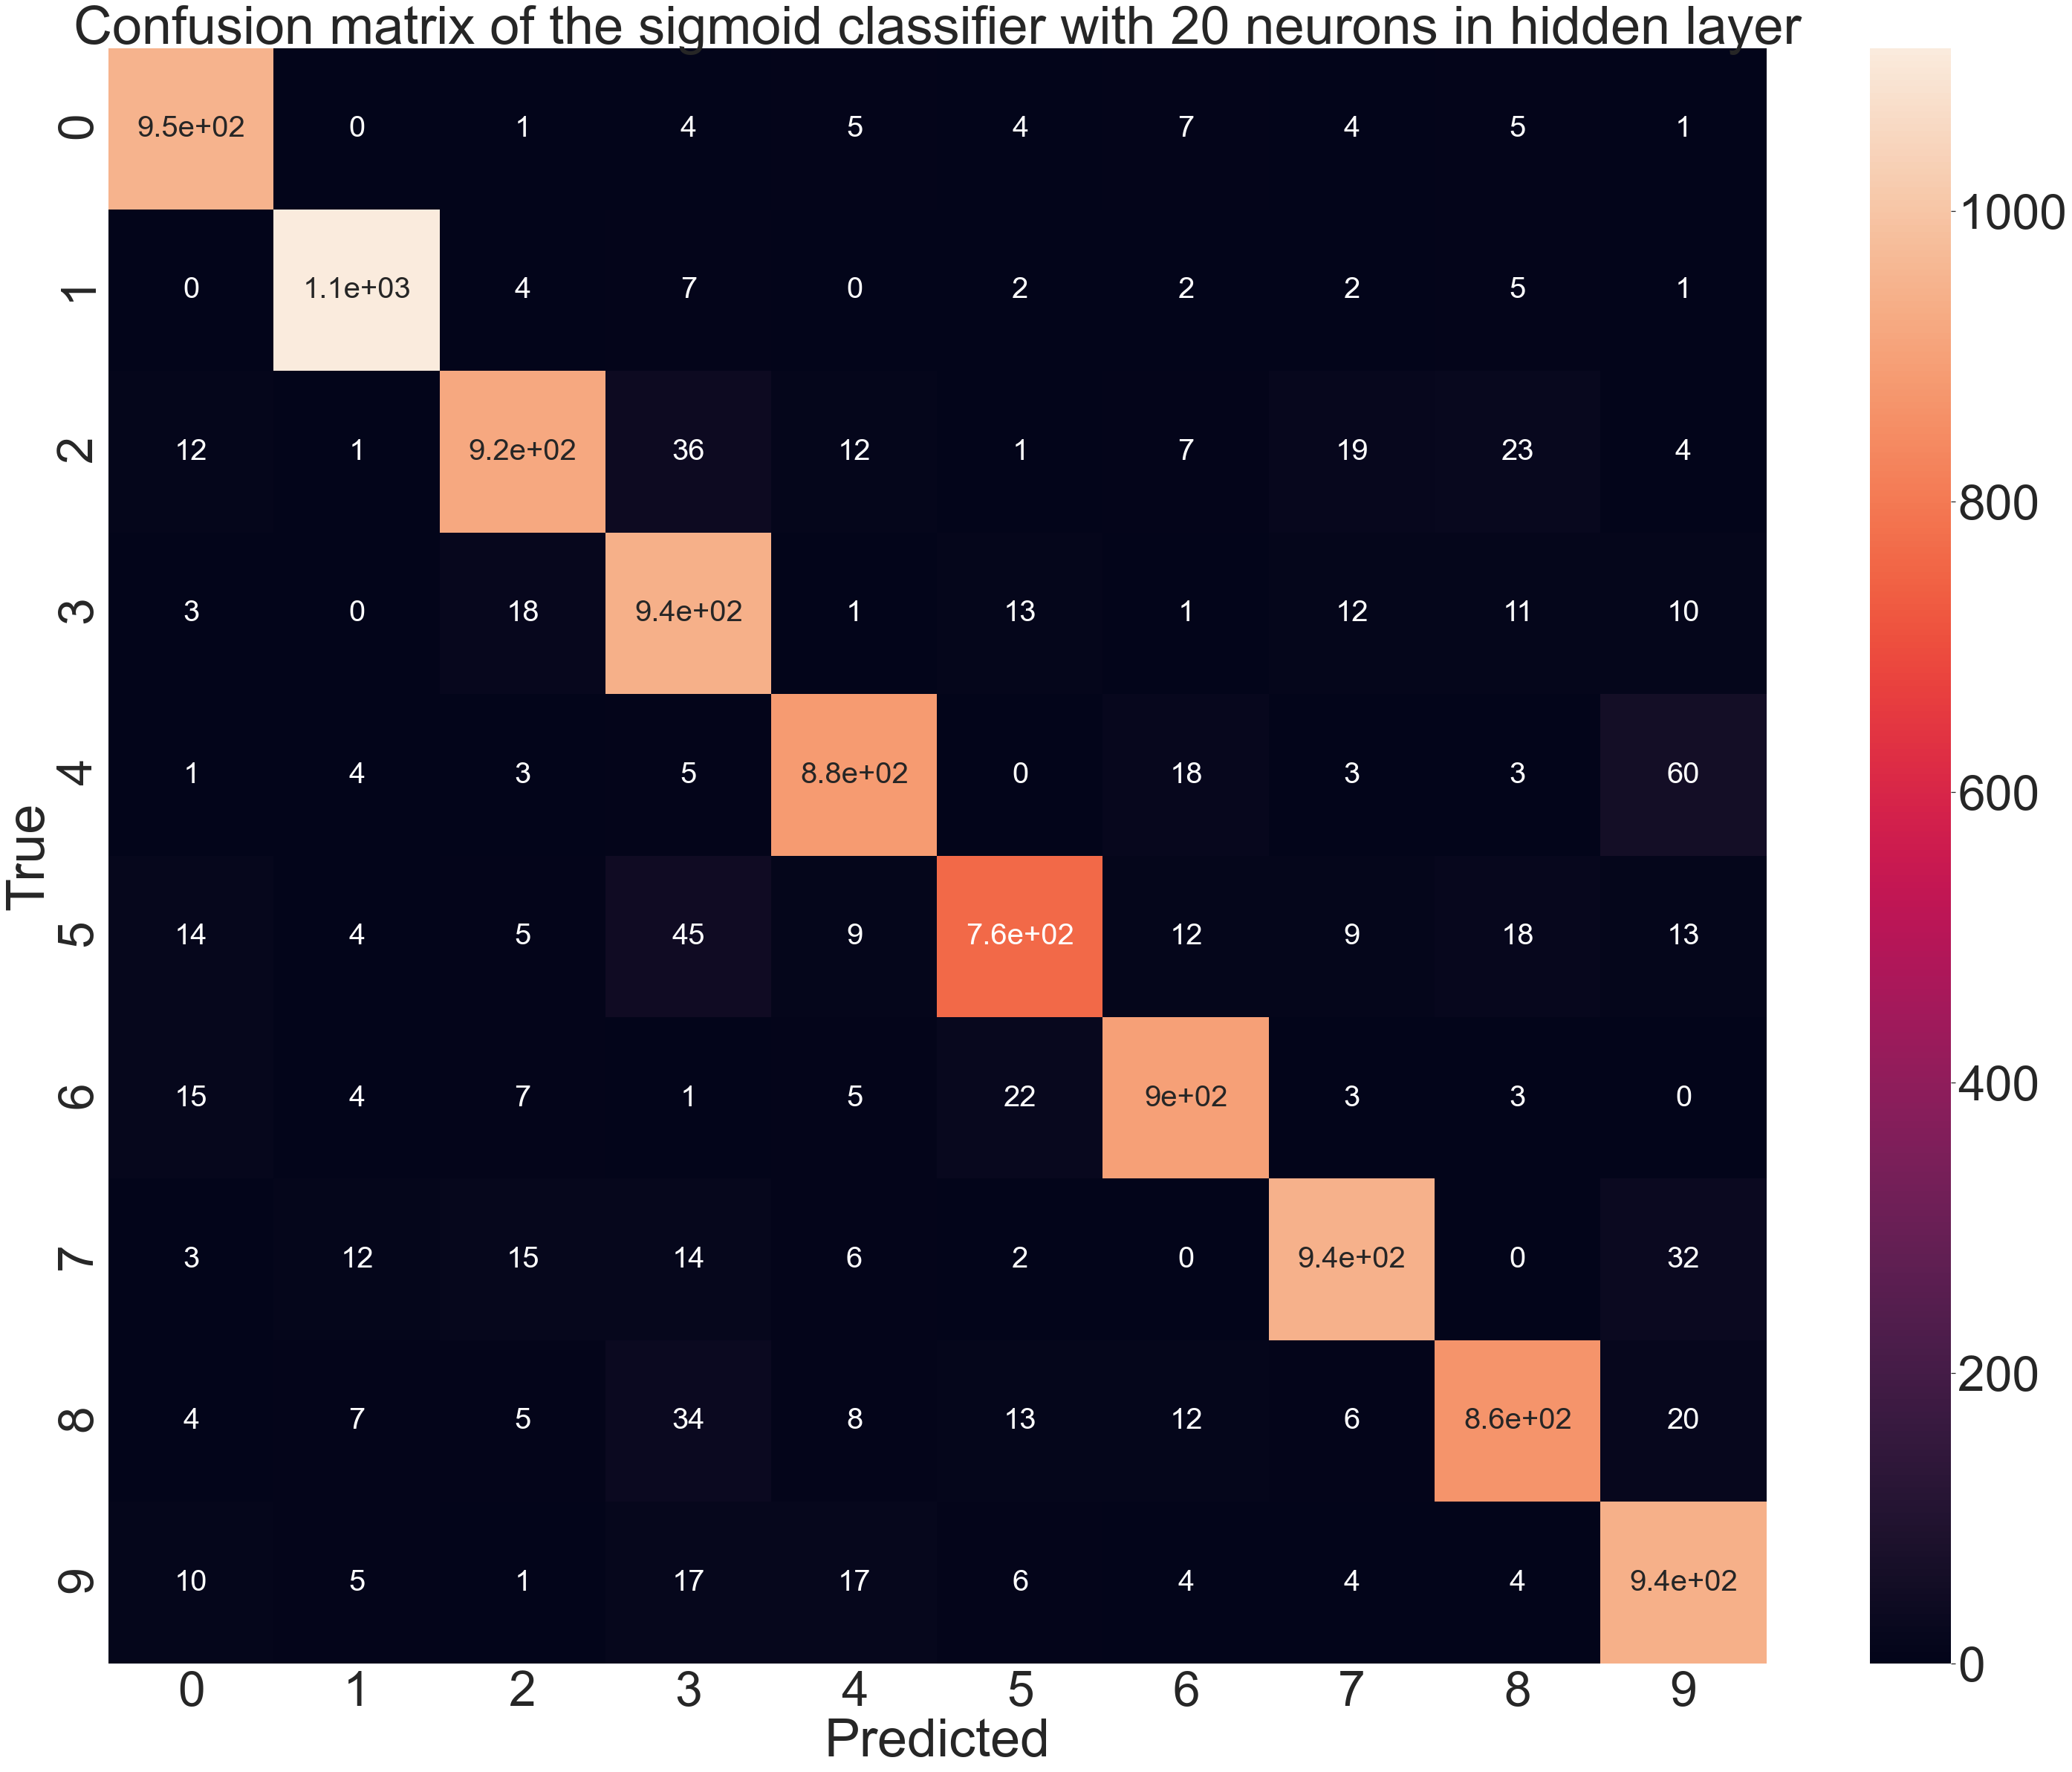

Sigmoid: ROC AUC=0.987
[[ 949    0    1    4    5    4    7    4    5    1]
 [   0 1112    4    7    0    2    2    2    5    1]
 [  12    1  917   36   12    1    7   19   23    4]
 [   3    0   18  941    1   13    1   12   11   10]
 [   1    4    3    5  885    0   18    3    3   60]
 [  14    4    5   45    9  763   12    9   18   13]
 [  15    4    7    1    5   22  898    3    3    0]
 [   3   12   15   14    6    2    0  944    0   32]
 [   4    7    5   34    8   13   12    6  865   20]
 [  10    5    1   17   17    6    4    4    4  941]]


In [11]:
#plotting confusion matrix
df_cm20 = pd.DataFrame(arr20, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cm20, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the sigmoid classifier with 20 neurons in hidden layer')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

auc20 = roc_auc_score(testingLabelFinal, output20)
#summarize scores
print('Sigmoid: ROC AUC=%.3f' % (auc20))

print(arr20)

Error: 0.8319714348602674 at epoch 1
Error: 0.7363246021159469 at epoch 2
Error: 0.6931344295934653 at epoch 3
Error: 0.6003202326414618 at epoch 4
Error: 0.5744762539382378 at epoch 5
Error: 0.5744692030103619 at epoch 6
Error: 0.574460178524922 at epoch 7
Error: 0.5744472414695124 at epoch 8
Error: 0.574424396036014 at epoch 9
Error: 0.5673899972560454 at epoch 10
Error: 0.48736896156976817 at epoch 11
Error: 0.48495887687849654 at epoch 12
Error: 0.47816817770480247 at epoch 13
Error: 0.4698547030626677 at epoch 14
Error: 0.463259565745794 at epoch 15
Error: 0.4613292359414058 at epoch 16
Error: 0.4031779359090458 at epoch 17
Error: 0.2890897432948509 at epoch 18
Error: 0.2825159322170015 at epoch 19
Error: 0.28172574384856874 at epoch 20


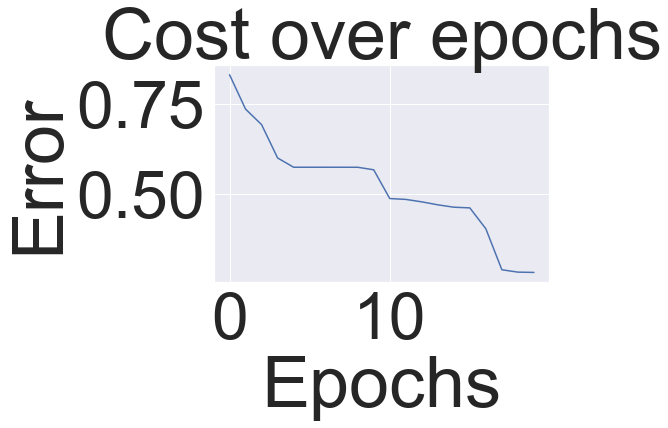

In [12]:
#neural network with 1 hidden layer, 30 neurons and 10 output neurons
NN30 = NeuralNetwork(training.shape[1], [30], 10)
#each row represents a data point and each column a feature
NN30.train(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9
output30 = NN30.feedForward(testingNormal)

print()
#getting confusion matrix
arr30 = confusion_matrix(testingLabelFinal.argmax(axis=1), output30.argmax(axis=1))

In [13]:
accuracyValue30 = accuracy(testingLabelFinal,output30)
print("Accuracy: {} %".format(accuracyValue30))

Accuracy: 9.74 %


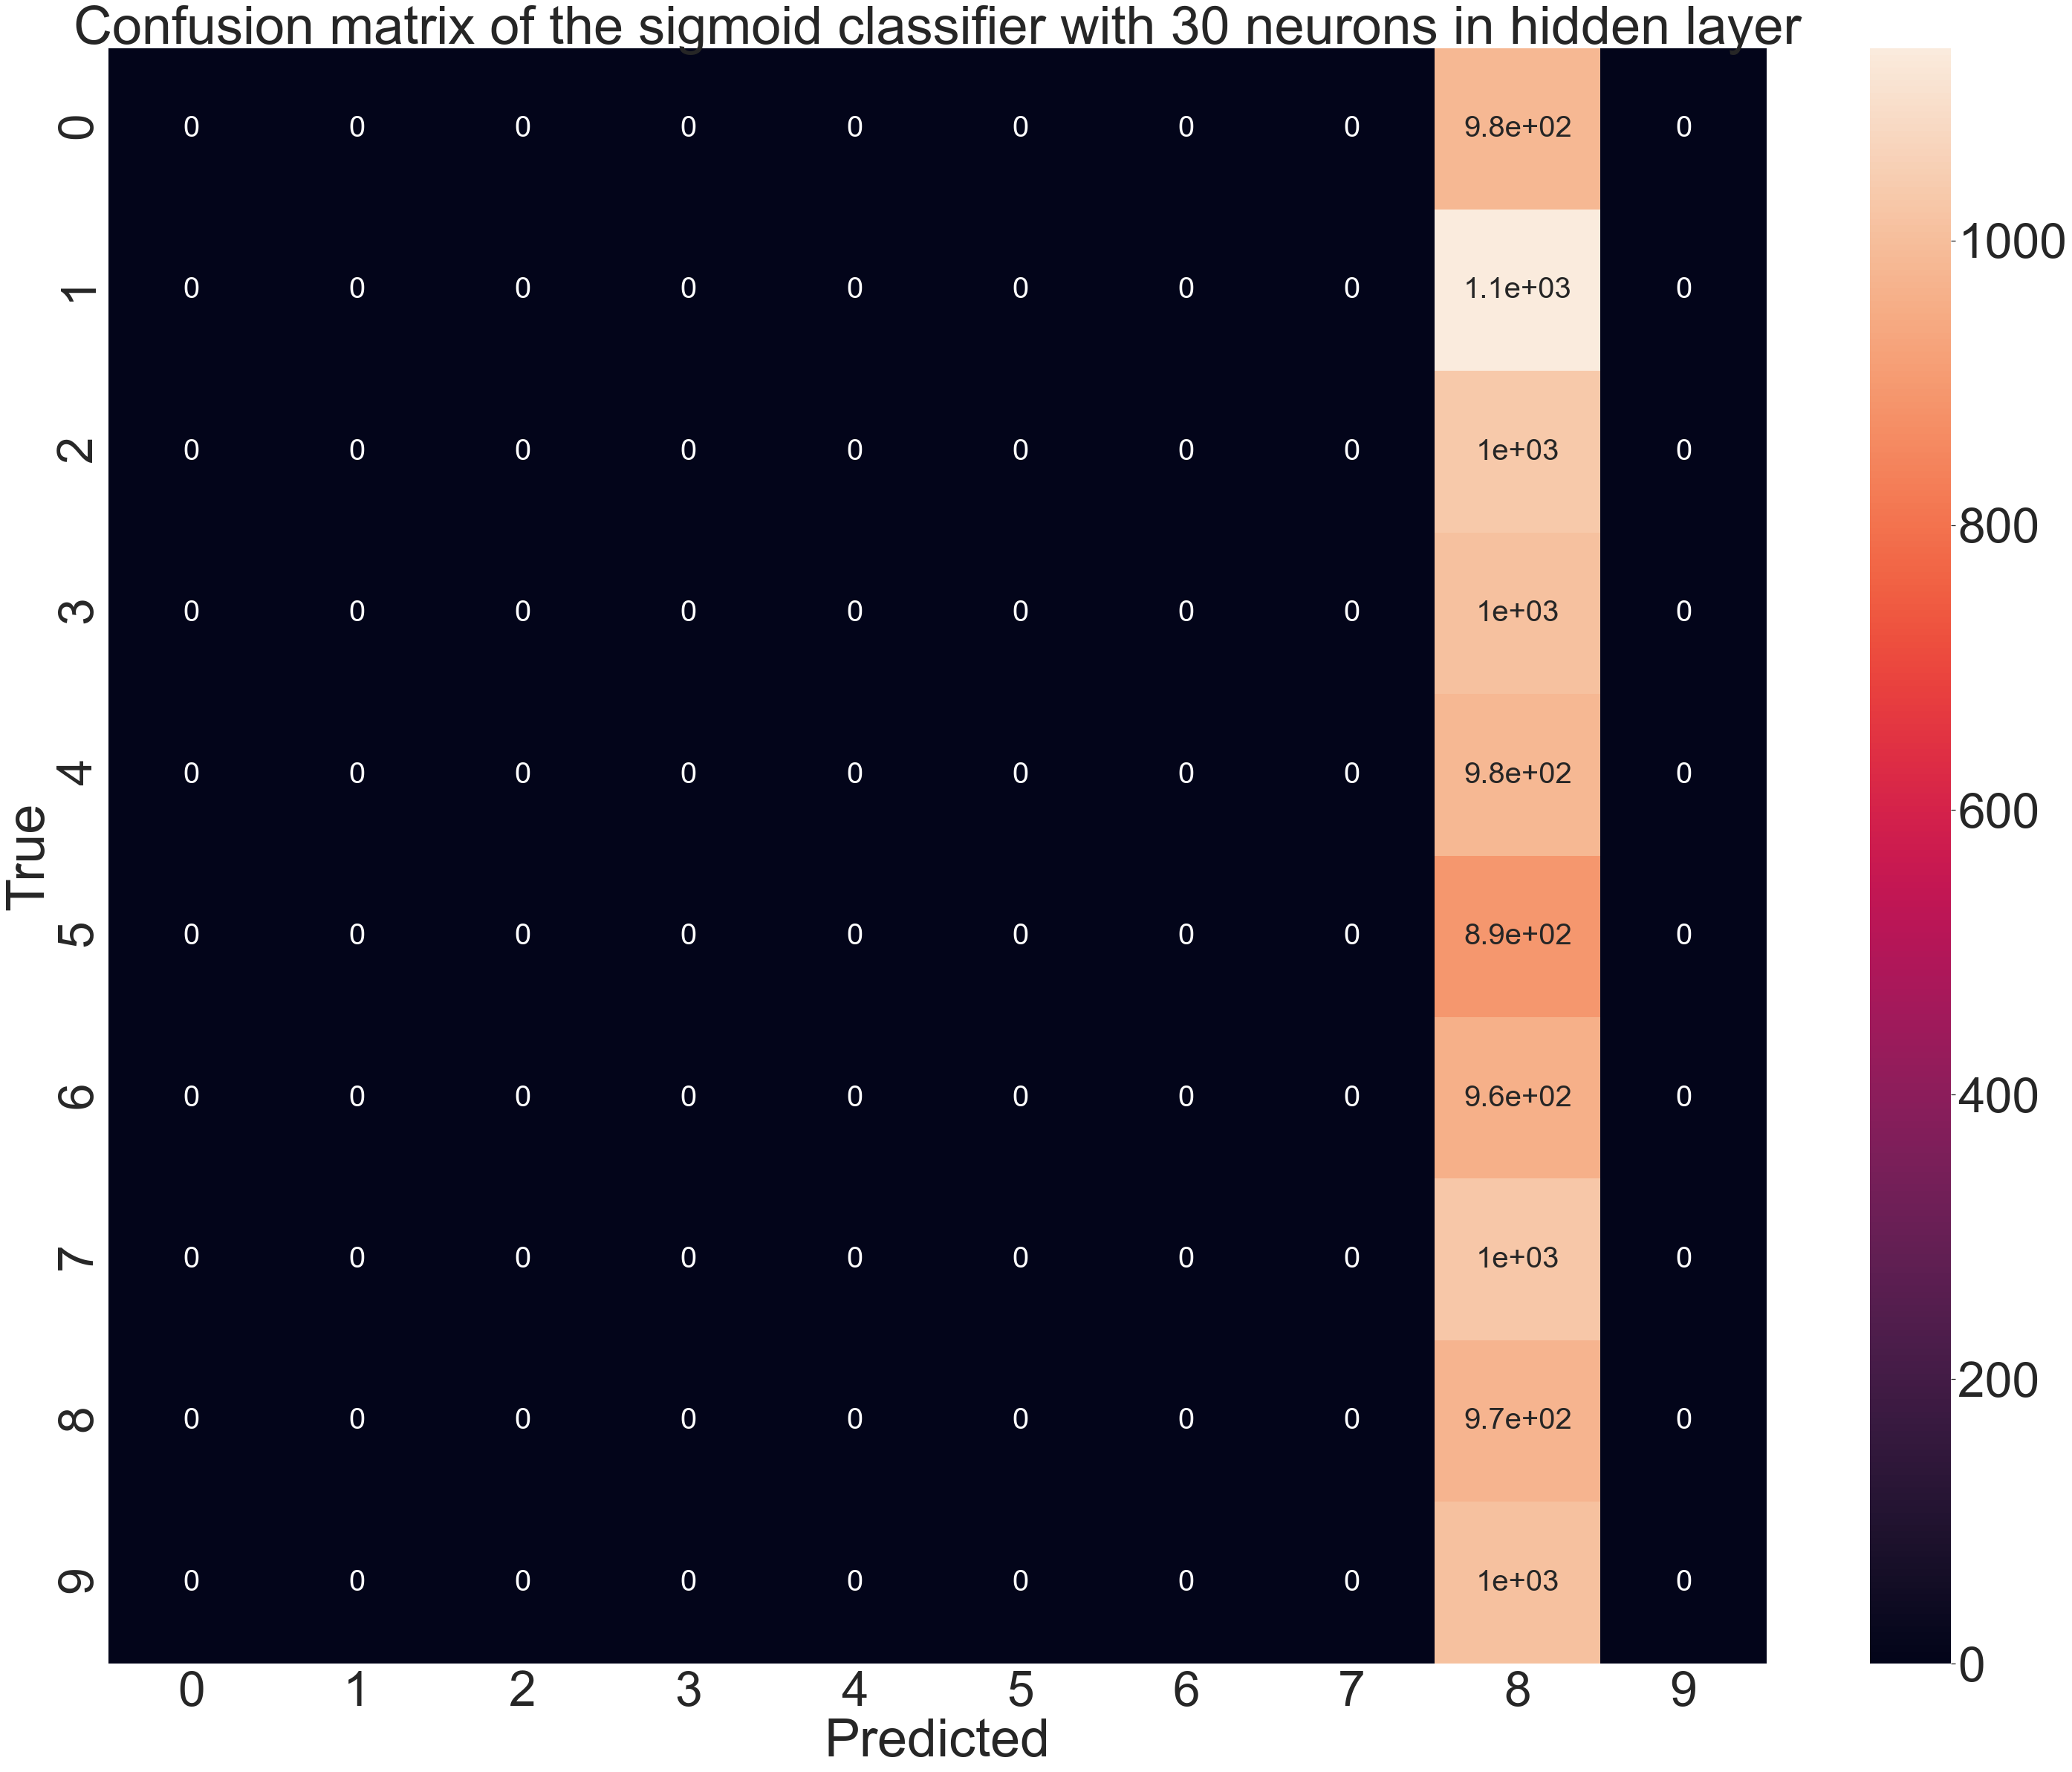

Sigmoid: ROC AUC=0.773
[[   0    0    0    0    0    0    0    0  980    0]
 [   0    0    0    0    0    0    0    0 1135    0]
 [   0    0    0    0    0    0    0    0 1032    0]
 [   0    0    0    0    0    0    0    0 1010    0]
 [   0    0    0    0    0    0    0    0  982    0]
 [   0    0    0    0    0    0    0    0  892    0]
 [   0    0    0    0    0    0    0    0  958    0]
 [   0    0    0    0    0    0    0    0 1028    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0 1009    0]]


In [14]:
#plotting confusion matrix
df_cm30 = pd.DataFrame(arr30, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cm30, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the sigmoid classifier with 30 neurons in hidden layer')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

auc30 = roc_auc_score(testingLabelFinal, output30)
#summarize scores
print('Sigmoid: ROC AUC=%.3f' % (auc30))

print(arr30)

Error: 0.0931052932903718 at epoch 1
Error: 0.09047118683532829 at epoch 2
Error: 0.09035077383286384 at epoch 3
Error: 0.09026176602547885 at epoch 4
Error: 0.09021138299991274 at epoch 5
Error: 0.09012898689452063 at epoch 6
Error: 0.09006526516054734 at epoch 7
Error: 0.0878349962745383 at epoch 8
Error: 0.0782157675831883 at epoch 9
Error: 0.06958262798757575 at epoch 10
Error: 0.06150084393383883 at epoch 11
Error: 0.05034476381365589 at epoch 12
Error: 0.04240279896347028 at epoch 13
Error: 0.0312824307751749 at epoch 14
Error: 0.028721305001796444 at epoch 15
Error: 0.0276805204013921 at epoch 16
Error: 0.02659006479400635 at epoch 17
Error: 0.025262193693947027 at epoch 18
Error: 0.023219497533990417 at epoch 19
Error: 0.02006977311564067 at epoch 20


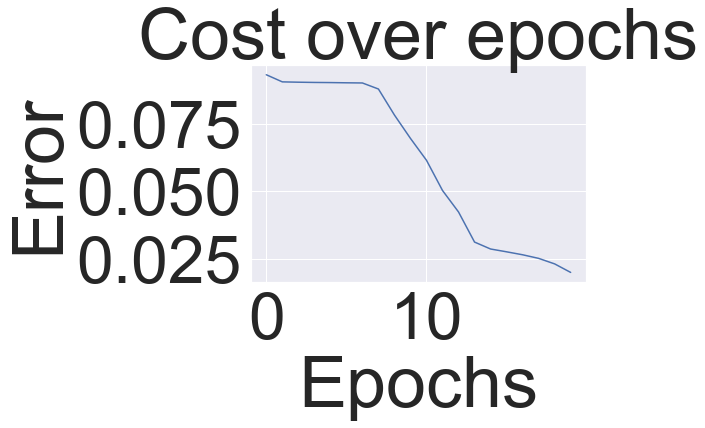

In [15]:
#neural network with 2 hidden layers, with 10 neurons each and 10 output neurons
NNtwoLayers = NeuralNetwork(training.shape[1], [10, 10], 10)
#each row represents a data point and each column a feature
NNtwoLayers.train(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9
outputTwoLayers = NNtwoLayers.feedForward(testingNormal)
print()
#getting confusion matrix
arrTwoLayers = confusion_matrix(testingLabelFinal.argmax(axis=1), outputTwoLayers.argmax(axis=1))

In [16]:
accuracyValueTwolayers = accuracy(testingLabelFinal,outputTwoLayers)
print("Accuracy: {} %".format(accuracyValueTwolayers))

Accuracy: 87.44 %


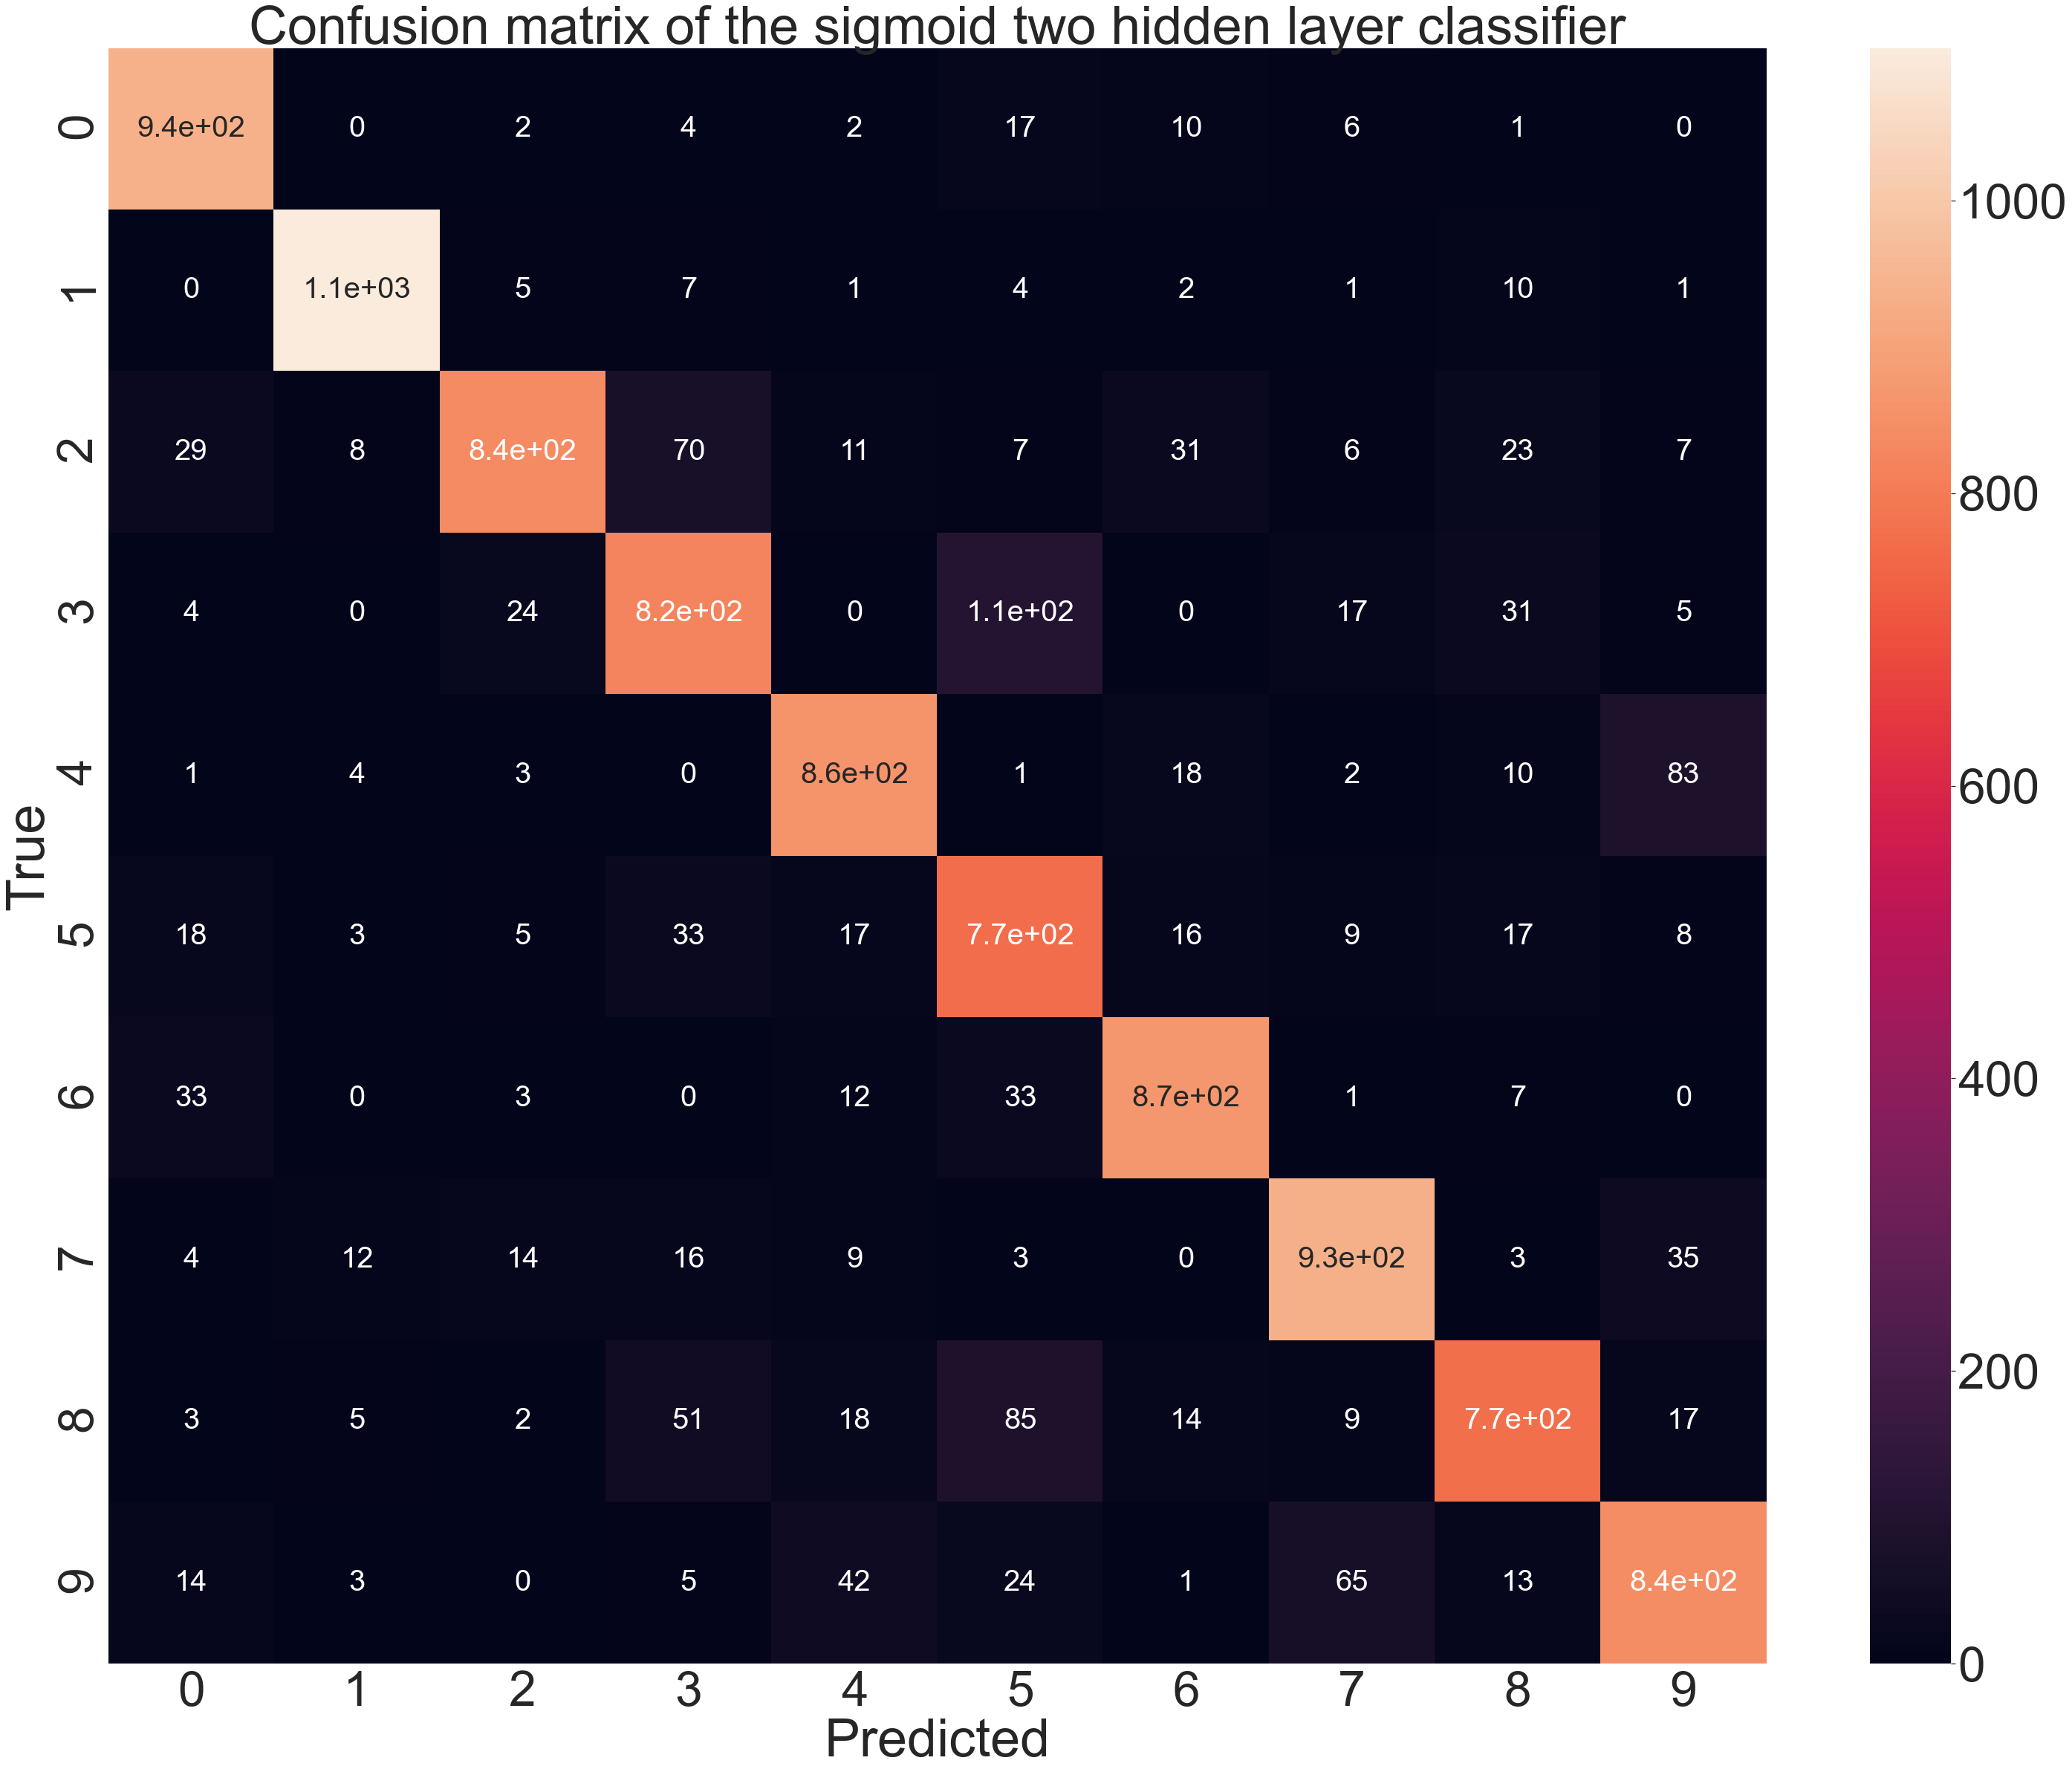

Sigmoid two layers: ROC AUC=0.980
[[ 938    0    2    4    2   17   10    6    1    0]
 [   0 1104    5    7    1    4    2    1   10    1]
 [  29    8  840   70   11    7   31    6   23    7]
 [   4    0   24  823    0  106    0   17   31    5]
 [   1    4    3    0  860    1   18    2   10   83]
 [  18    3    5   33   17  766   16    9   17    8]
 [  33    0    3    0   12   33  869    1    7    0]
 [   4   12   14   16    9    3    0  932    3   35]
 [   3    5    2   51   18   85   14    9  770   17]
 [  14    3    0    5   42   24    1   65   13  842]]


In [17]:
df_cmTwoLayers = pd.DataFrame(arrTwoLayers, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cmTwoLayers, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the sigmoid two hidden layer classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

aucTwoLayers = roc_auc_score(testingLabelFinal, outputTwoLayers)
#summarize scores
print('Sigmoid two layers: ROC AUC=%.3f' % (aucTwoLayers))

print(arrTwoLayers)

Error: 0.0935804358831335 at epoch 1
Error: 0.09053147713650121 at epoch 2
Error: 0.09046734393945004 at epoch 3
Error: 0.09034298337183468 at epoch 4
Error: 0.0902180295596218 at epoch 5
Error: 0.09014614966630455 at epoch 6
Error: 0.09012326525270604 at epoch 7
Error: 0.09009495201799593 at epoch 8
Error: 0.09007578081258275 at epoch 9
Error: 0.09006708760106313 at epoch 10
Error: 0.09006167730154106 at epoch 11
Error: 0.09005790946137224 at epoch 12
Error: 0.09005513197482198 at epoch 13
Error: 0.09005298074132131 at epoch 14
Error: 0.09005120776747018 at epoch 15
Error: 0.09004957749568956 at epoch 16
Error: 0.09004765892959037 at epoch 17
Error: 0.09004363759869372 at epoch 18
Error: 0.09003138910847447 at epoch 19
Error: 0.0900194173732488 at epoch 20


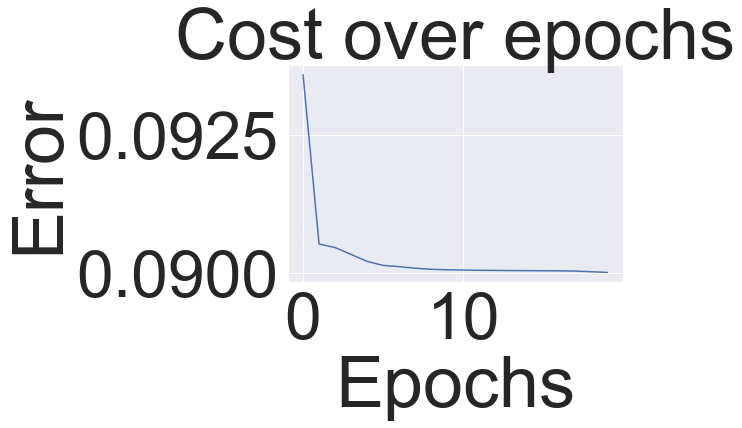

In [18]:
#neural network with 3 hidden layers, 10 neurons in each layers and 10 output layers
NNthreeLayers = NeuralNetwork(training.shape[1], [10, 10, 10], 10)
#each row represents a data point and each column a feature
NNthreeLayers.train(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9
outputThreeLayers = NNthreeLayers.feedForward(testingNormal)
print()
#getting confusion matrix
arrThreeLayers = confusion_matrix(testingLabelFinal.argmax(axis=1), outputThreeLayers.argmax(axis=1))

In [19]:
accuracyValueThreelayers = accuracy(testingLabelFinal,outputThreeLayers)
print("Accuracy: {} %".format(accuracyValueThreelayers))

Accuracy: 11.35 %


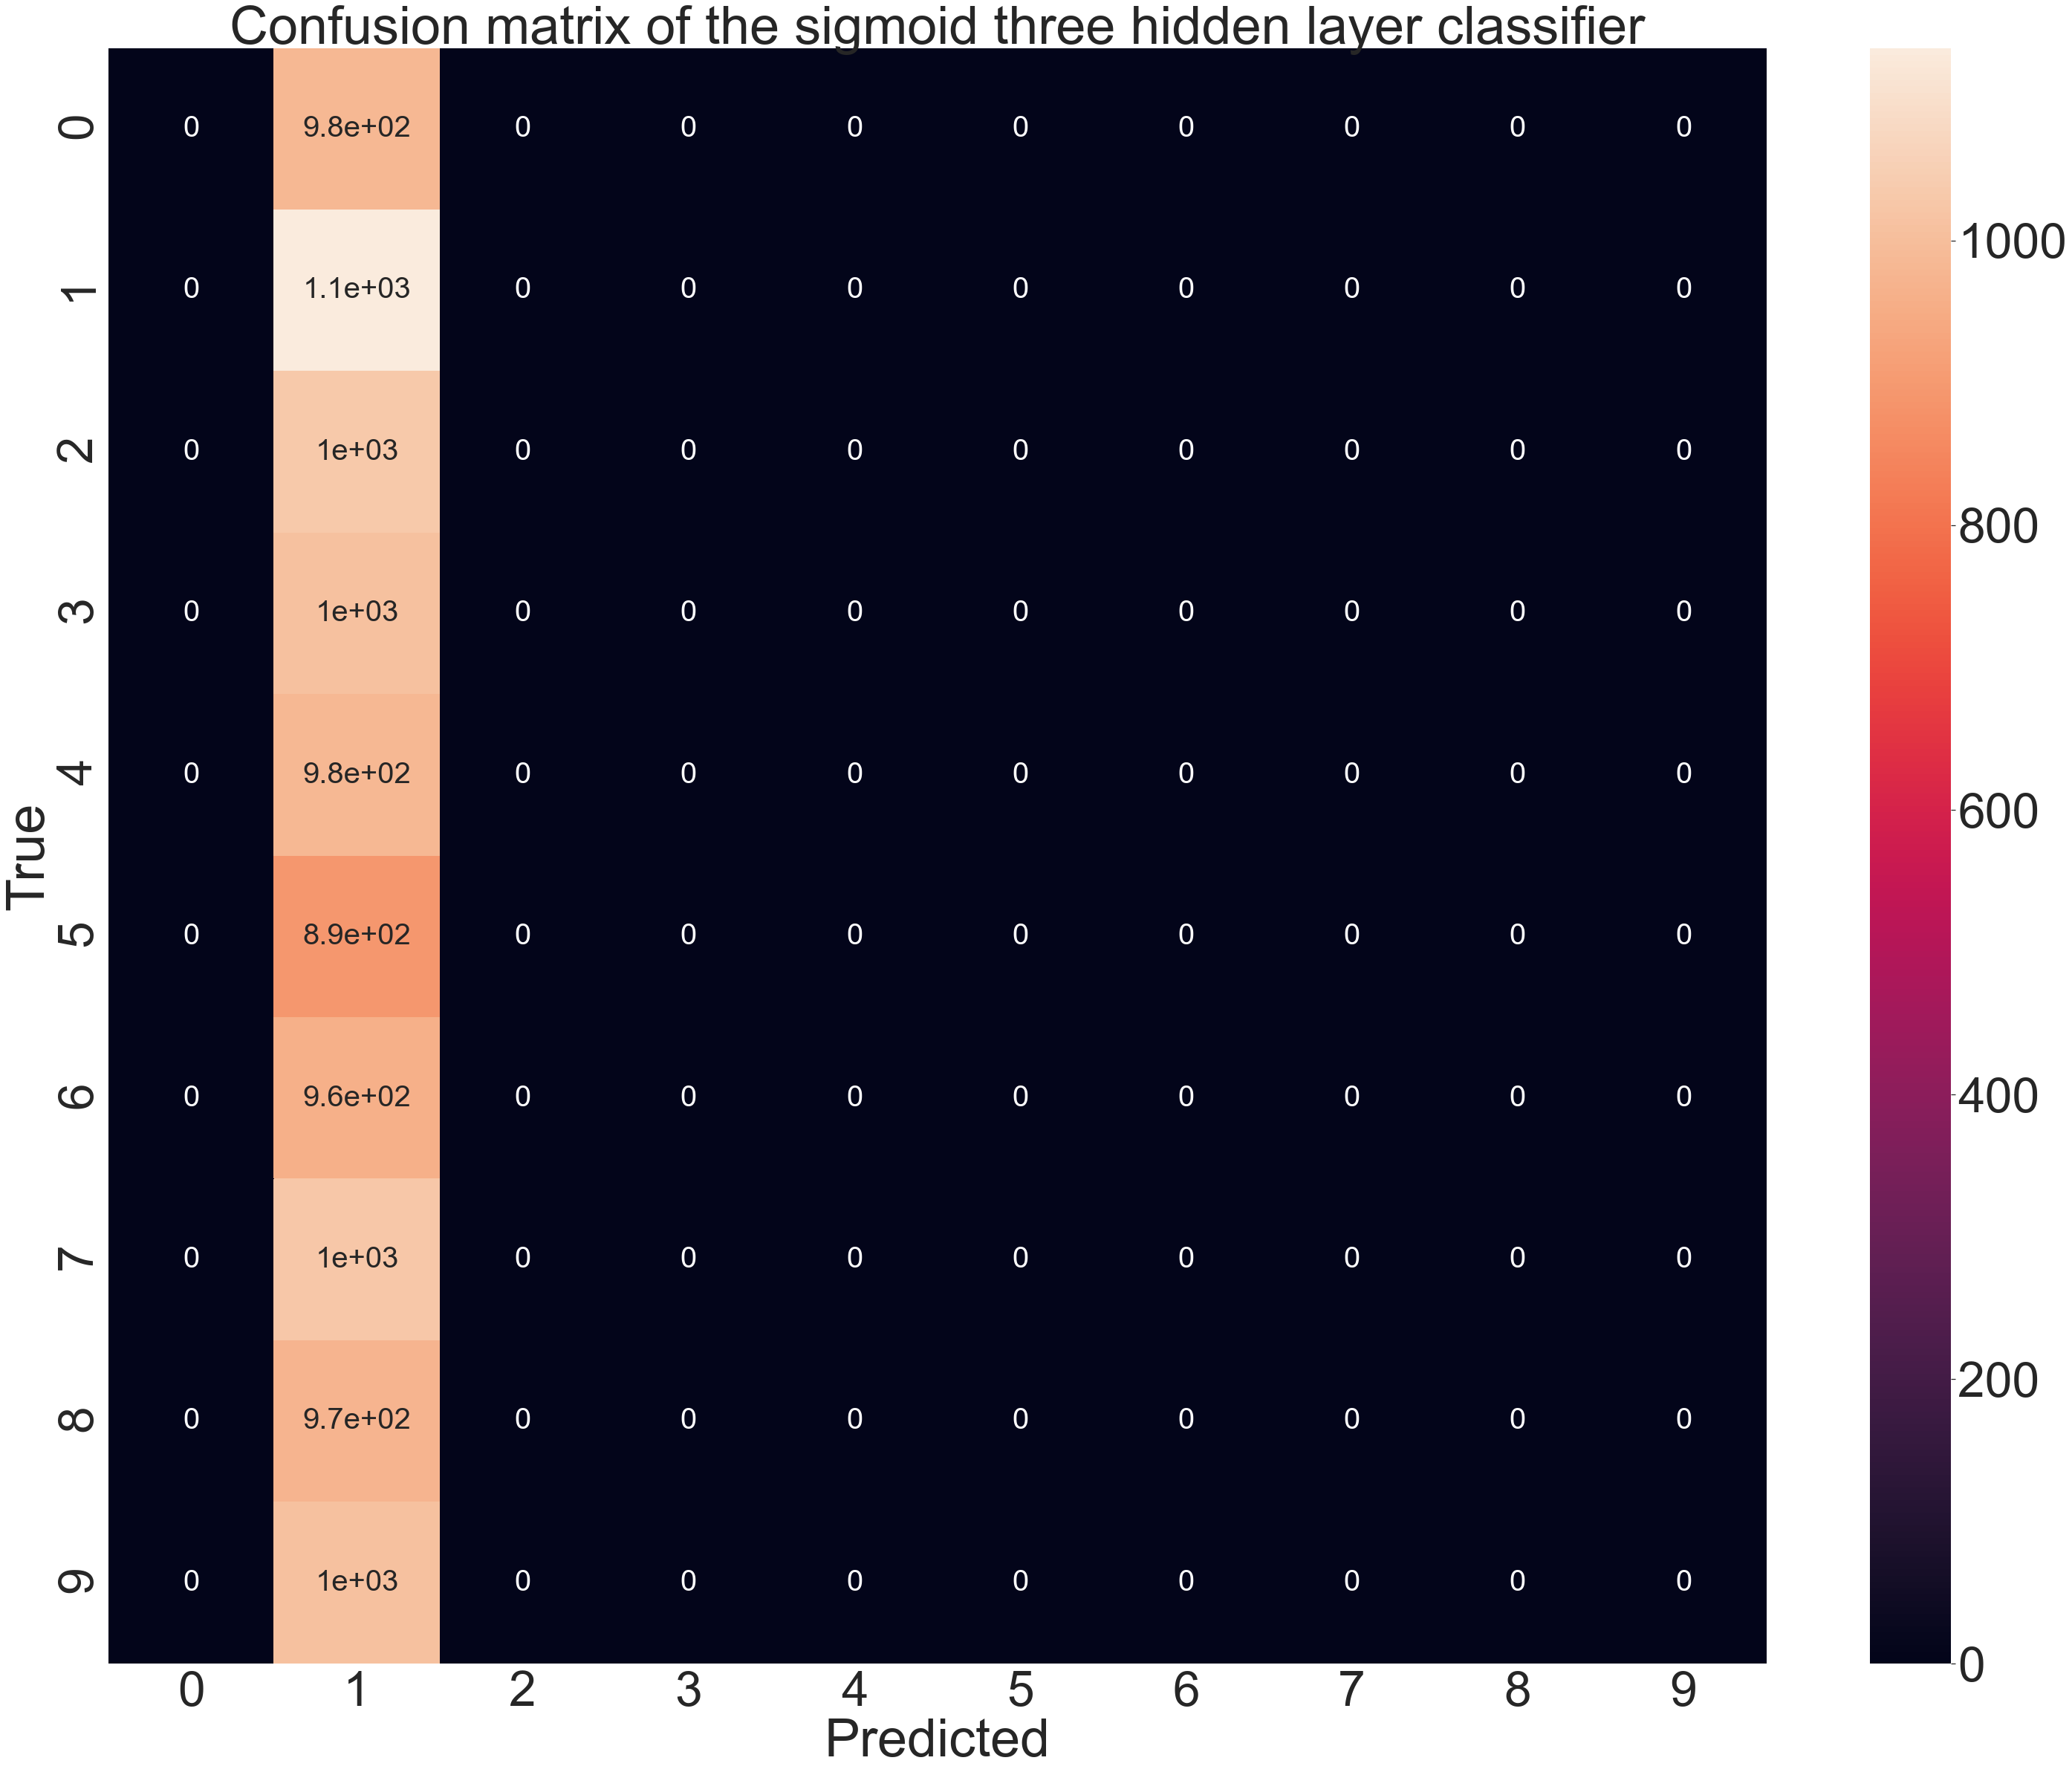

Sigmoid three layers: ROC AUC=0.568
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


In [20]:
df_cmThreeLayers = pd.DataFrame(arrThreeLayers, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cmThreeLayers, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the sigmoid three hidden layer classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

aucThreeLayers = roc_auc_score(testingLabelFinal, outputThreeLayers)
#summarize scores
print('Sigmoid three layers: ROC AUC=%.3f' % (aucThreeLayers))

print(arrThreeLayers)

Error: 0.056726116624369355 at epoch 1
Error: 0.044888468088601946 at epoch 2
Error: 0.04372635864758326 at epoch 3
Error: 0.04326818133486196 at epoch 4
Error: 0.0430209420115399 at epoch 5
Error: 0.042865241210742804 at epoch 6
Error: 0.042757917032140436 at epoch 7
Error: 0.04267904074665762 at epoch 8
Error: 0.042618112898821905 at epoch 9
Error: 0.042569164141632934 at epoch 10
Error: 0.042528569569610805 at epoch 11
Error: 0.0424939886425384 at epoch 12
Error: 0.042463816856792166 at epoch 13
Error: 0.04243687830744451 at epoch 14
Error: 0.04241223329534934 at epoch 15
Error: 0.04238903693927758 at epoch 16
Error: 0.042366416583347895 at epoch 17
Error: 0.042343379209241326 at epoch 18
Error: 0.04231888119039708 at epoch 19
Error: 0.042292353637231966 at epoch 20


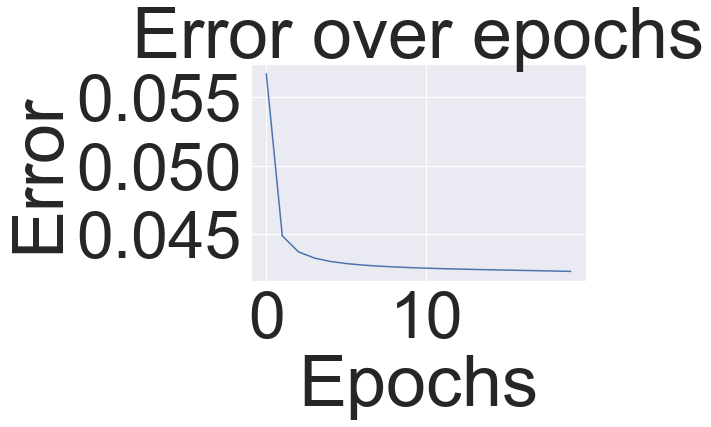

In [21]:
#neural network with 1 hidden layer, which have ten 10 neurons and 10 output neurons
NNtanh = NeuralNetwork(training.shape[1], [10], 10)
#each row represents a data point and each column a feature
NNtanh.trainTanh(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9 
outputTanh = NNtanh.feedForwardTanh(testingNormal)

print()
#getting confusion matrix
arrTanh = confusion_matrix(testingLabelFinal.argmax(axis=1), outputTanh.argmax(axis=1))

In [22]:
accuracyValueTanh = accuracy(testingLabelFinal,outputTanh)
print("Accuracy: {} %".format(accuracyValueTanh))

Accuracy: 82.32000000000001 %


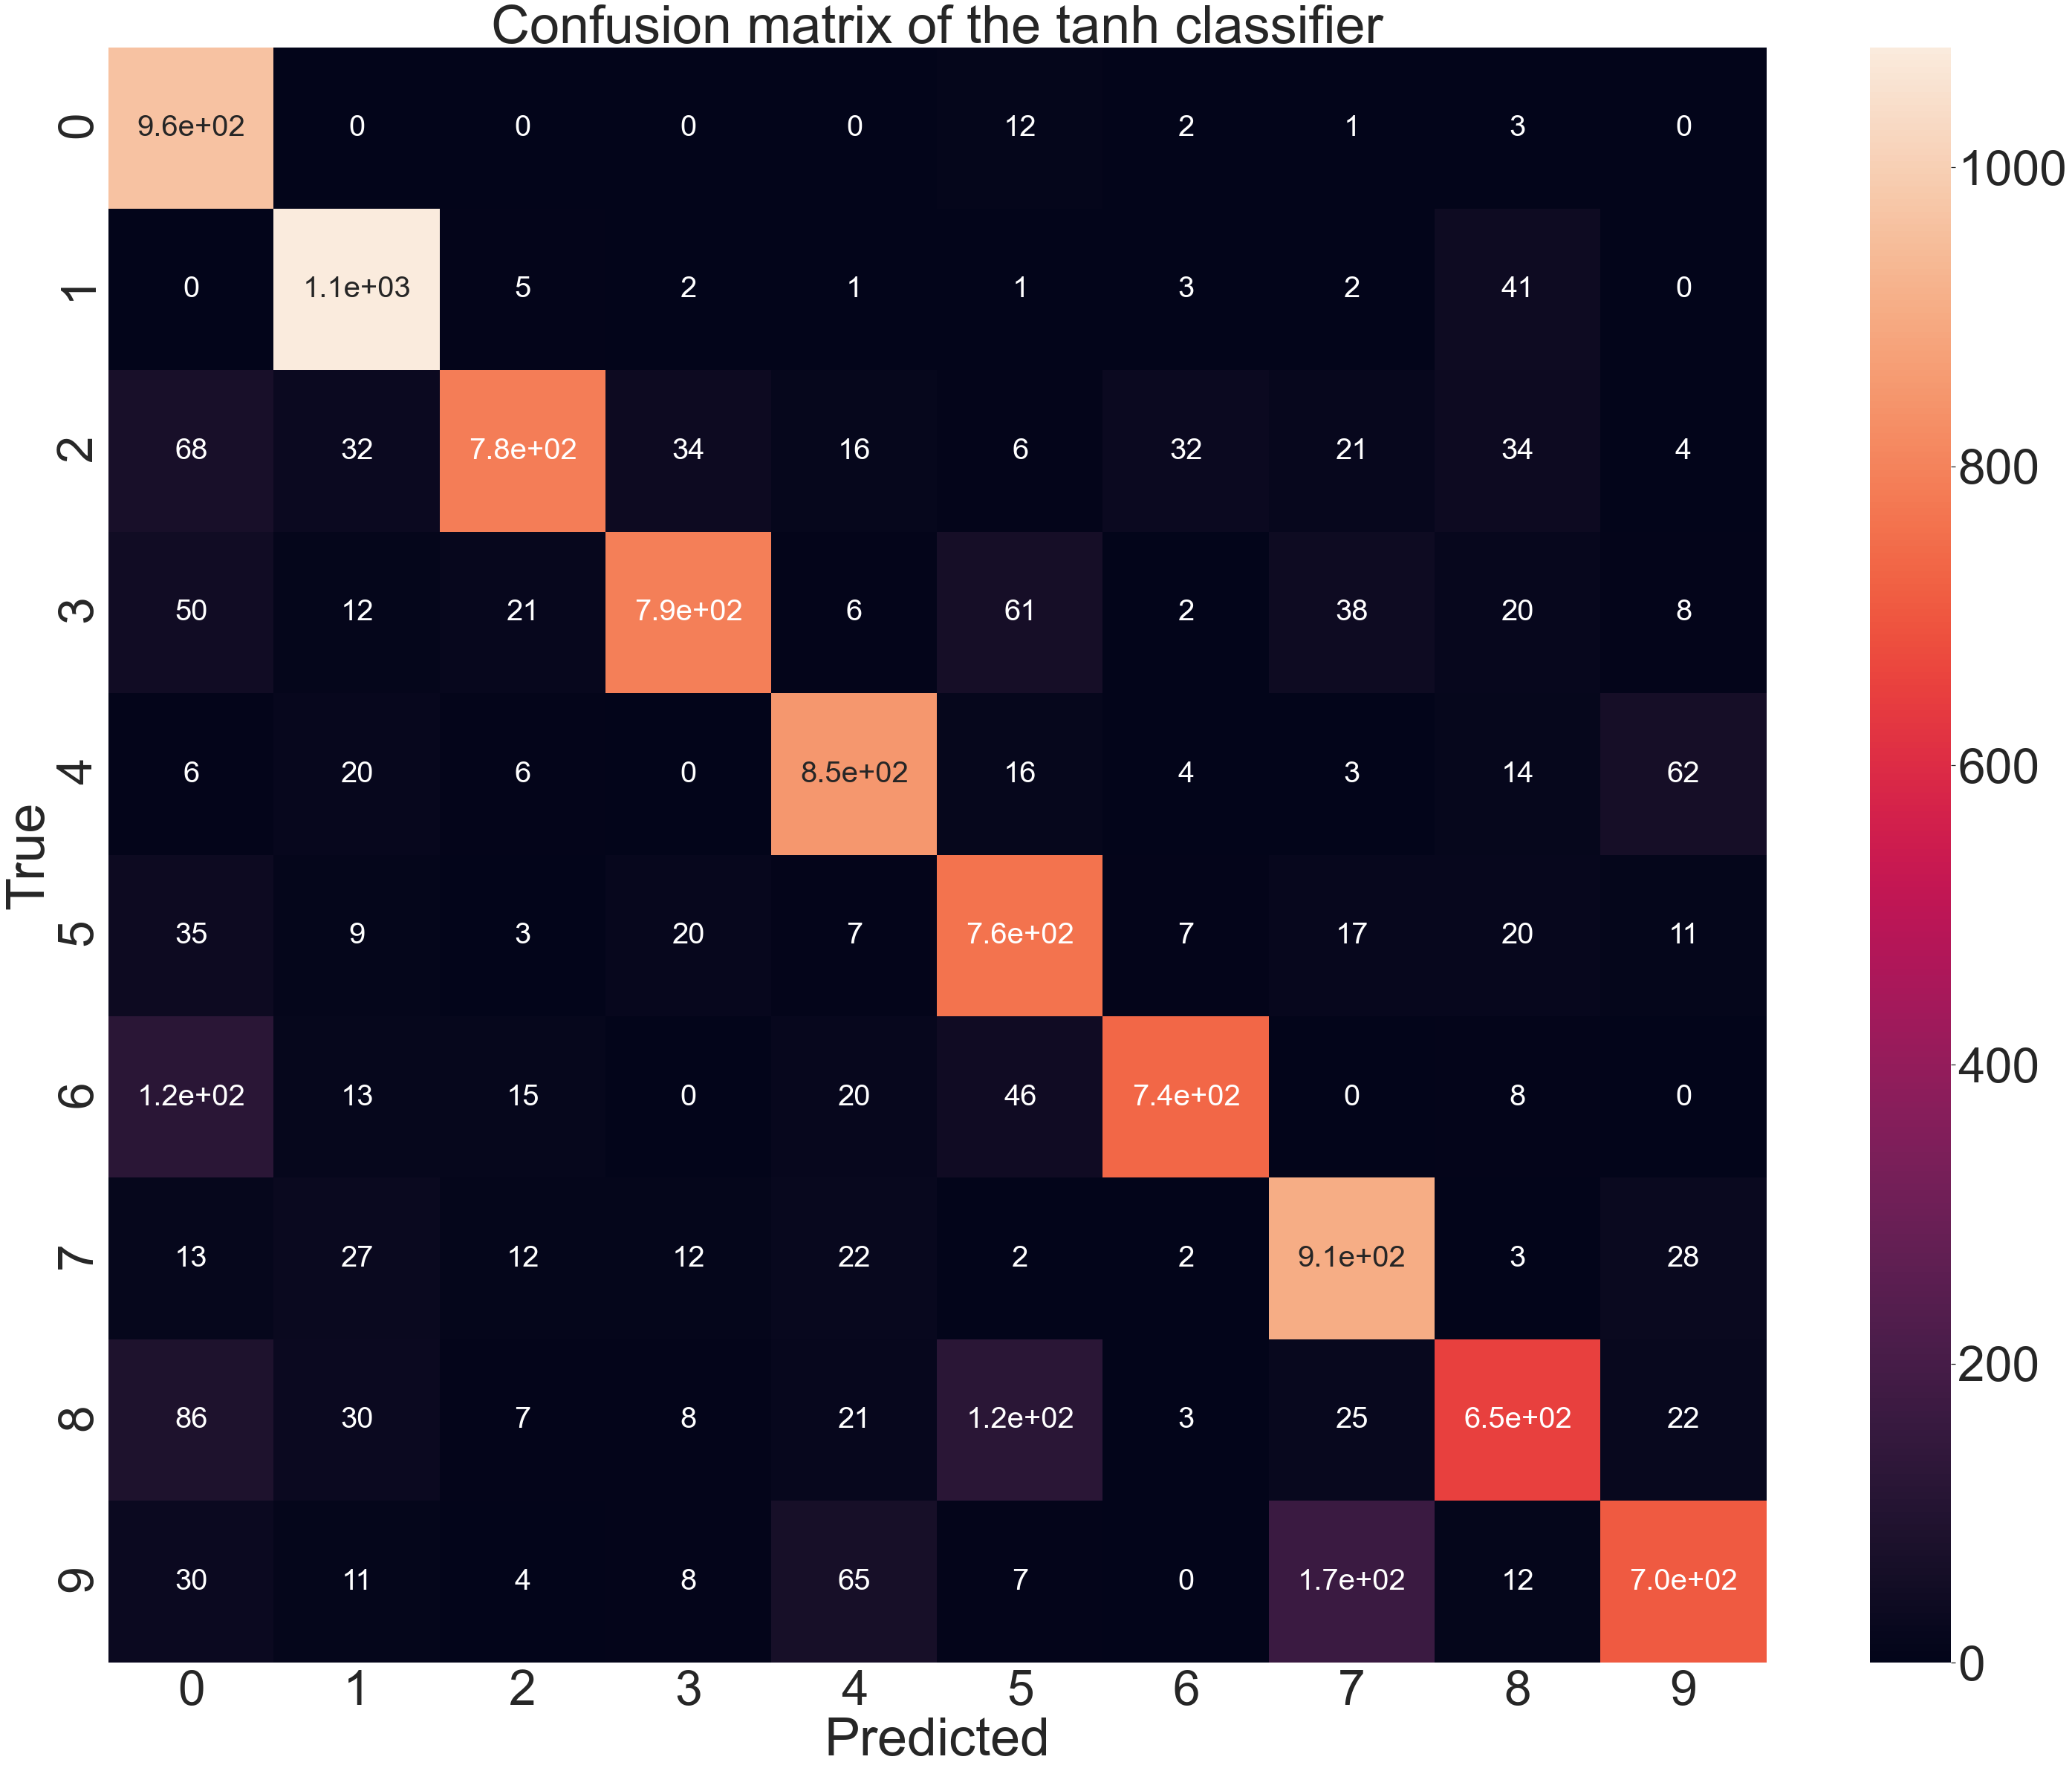

Tanh: ROC AUC=0.974
[[ 962    0    0    0    0   12    2    1    3    0]
 [   0 1080    5    2    1    1    3    2   41    0]
 [  68   32  785   34   16    6   32   21   34    4]
 [  50   12   21  792    6   61    2   38   20    8]
 [   6   20    6    0  851   16    4    3   14   62]
 [  35    9    3   20    7  763    7   17   20   11]
 [ 121   13   15    0   20   46  735    0    8    0]
 [  13   27   12   12   22    2    2  907    3   28]
 [  86   30    7    8   21  120    3   25  652   22]
 [  30   11    4    8   65    7    0  167   12  705]]


In [23]:
df_cmTanh = pd.DataFrame(arrTanh, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cmTanh, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the tanh classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

aucTanh = roc_auc_score(testingLabelFinal, outputTanh)
#summarize scores
print('Tanh: ROC AUC=%.3f' % (aucTanh))

print(arrTanh)

Error: 0.08760080366353622 at epoch 1
Error: 0.05948555942278541 at epoch 2
Error: 0.03649922412624163 at epoch 3
Error: 0.035304892127953014 at epoch 4
Error: 0.03489167312571284 at epoch 5
Error: 0.03216155478267986 at epoch 6
Error: 0.031206856838960868 at epoch 7
Error: 0.030985725981472305 at epoch 8
Error: 0.030881305184552708 at epoch 9
Error: 0.03080718265180043 at epoch 10
Error: 0.0307506915819453 at epoch 11
Error: 0.030706439915273658 at epoch 12
Error: 0.030670710333539 at epoch 13
Error: 0.030640965246278212 at epoch 14
Error: 0.03061548033694582 at epoch 15
Error: 0.030593063243254576 at epoch 16
Error: 0.030572857637062384 at epoch 17
Error: 0.03055421726447209 at epoch 18
Error: 0.030536635395530472 at epoch 19
Error: 0.030519713667784214 at epoch 20


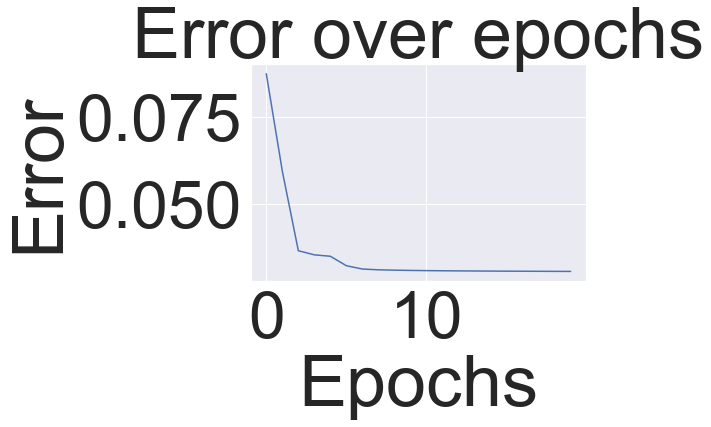

In [24]:
#neural network with 2 hidden layers, 10 neurons each layer and 10 output neurons
NNtanhTwoLayers = NeuralNetwork(training.shape[1], [10, 10], 10)
#each row represents a data point and each column a feature
NNtanhTwoLayers.trainTanh(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9 
outputTanhTwoLayers = NNtanhTwoLayers.feedForwardTanh(testingNormal)

print()
#getting confusion matrix
arrTanhTwoLayers = confusion_matrix(testingLabelFinal.argmax(axis=1), outputTanhTwoLayers.argmax(axis=1))

In [25]:
accuracyValueTanhTwoLayers = accuracy(testingLabelFinal,outputTanhTwoLayers)
print("Accuracy: {} %".format(accuracyValueTanhTwoLayers))

Accuracy: 89.36 %


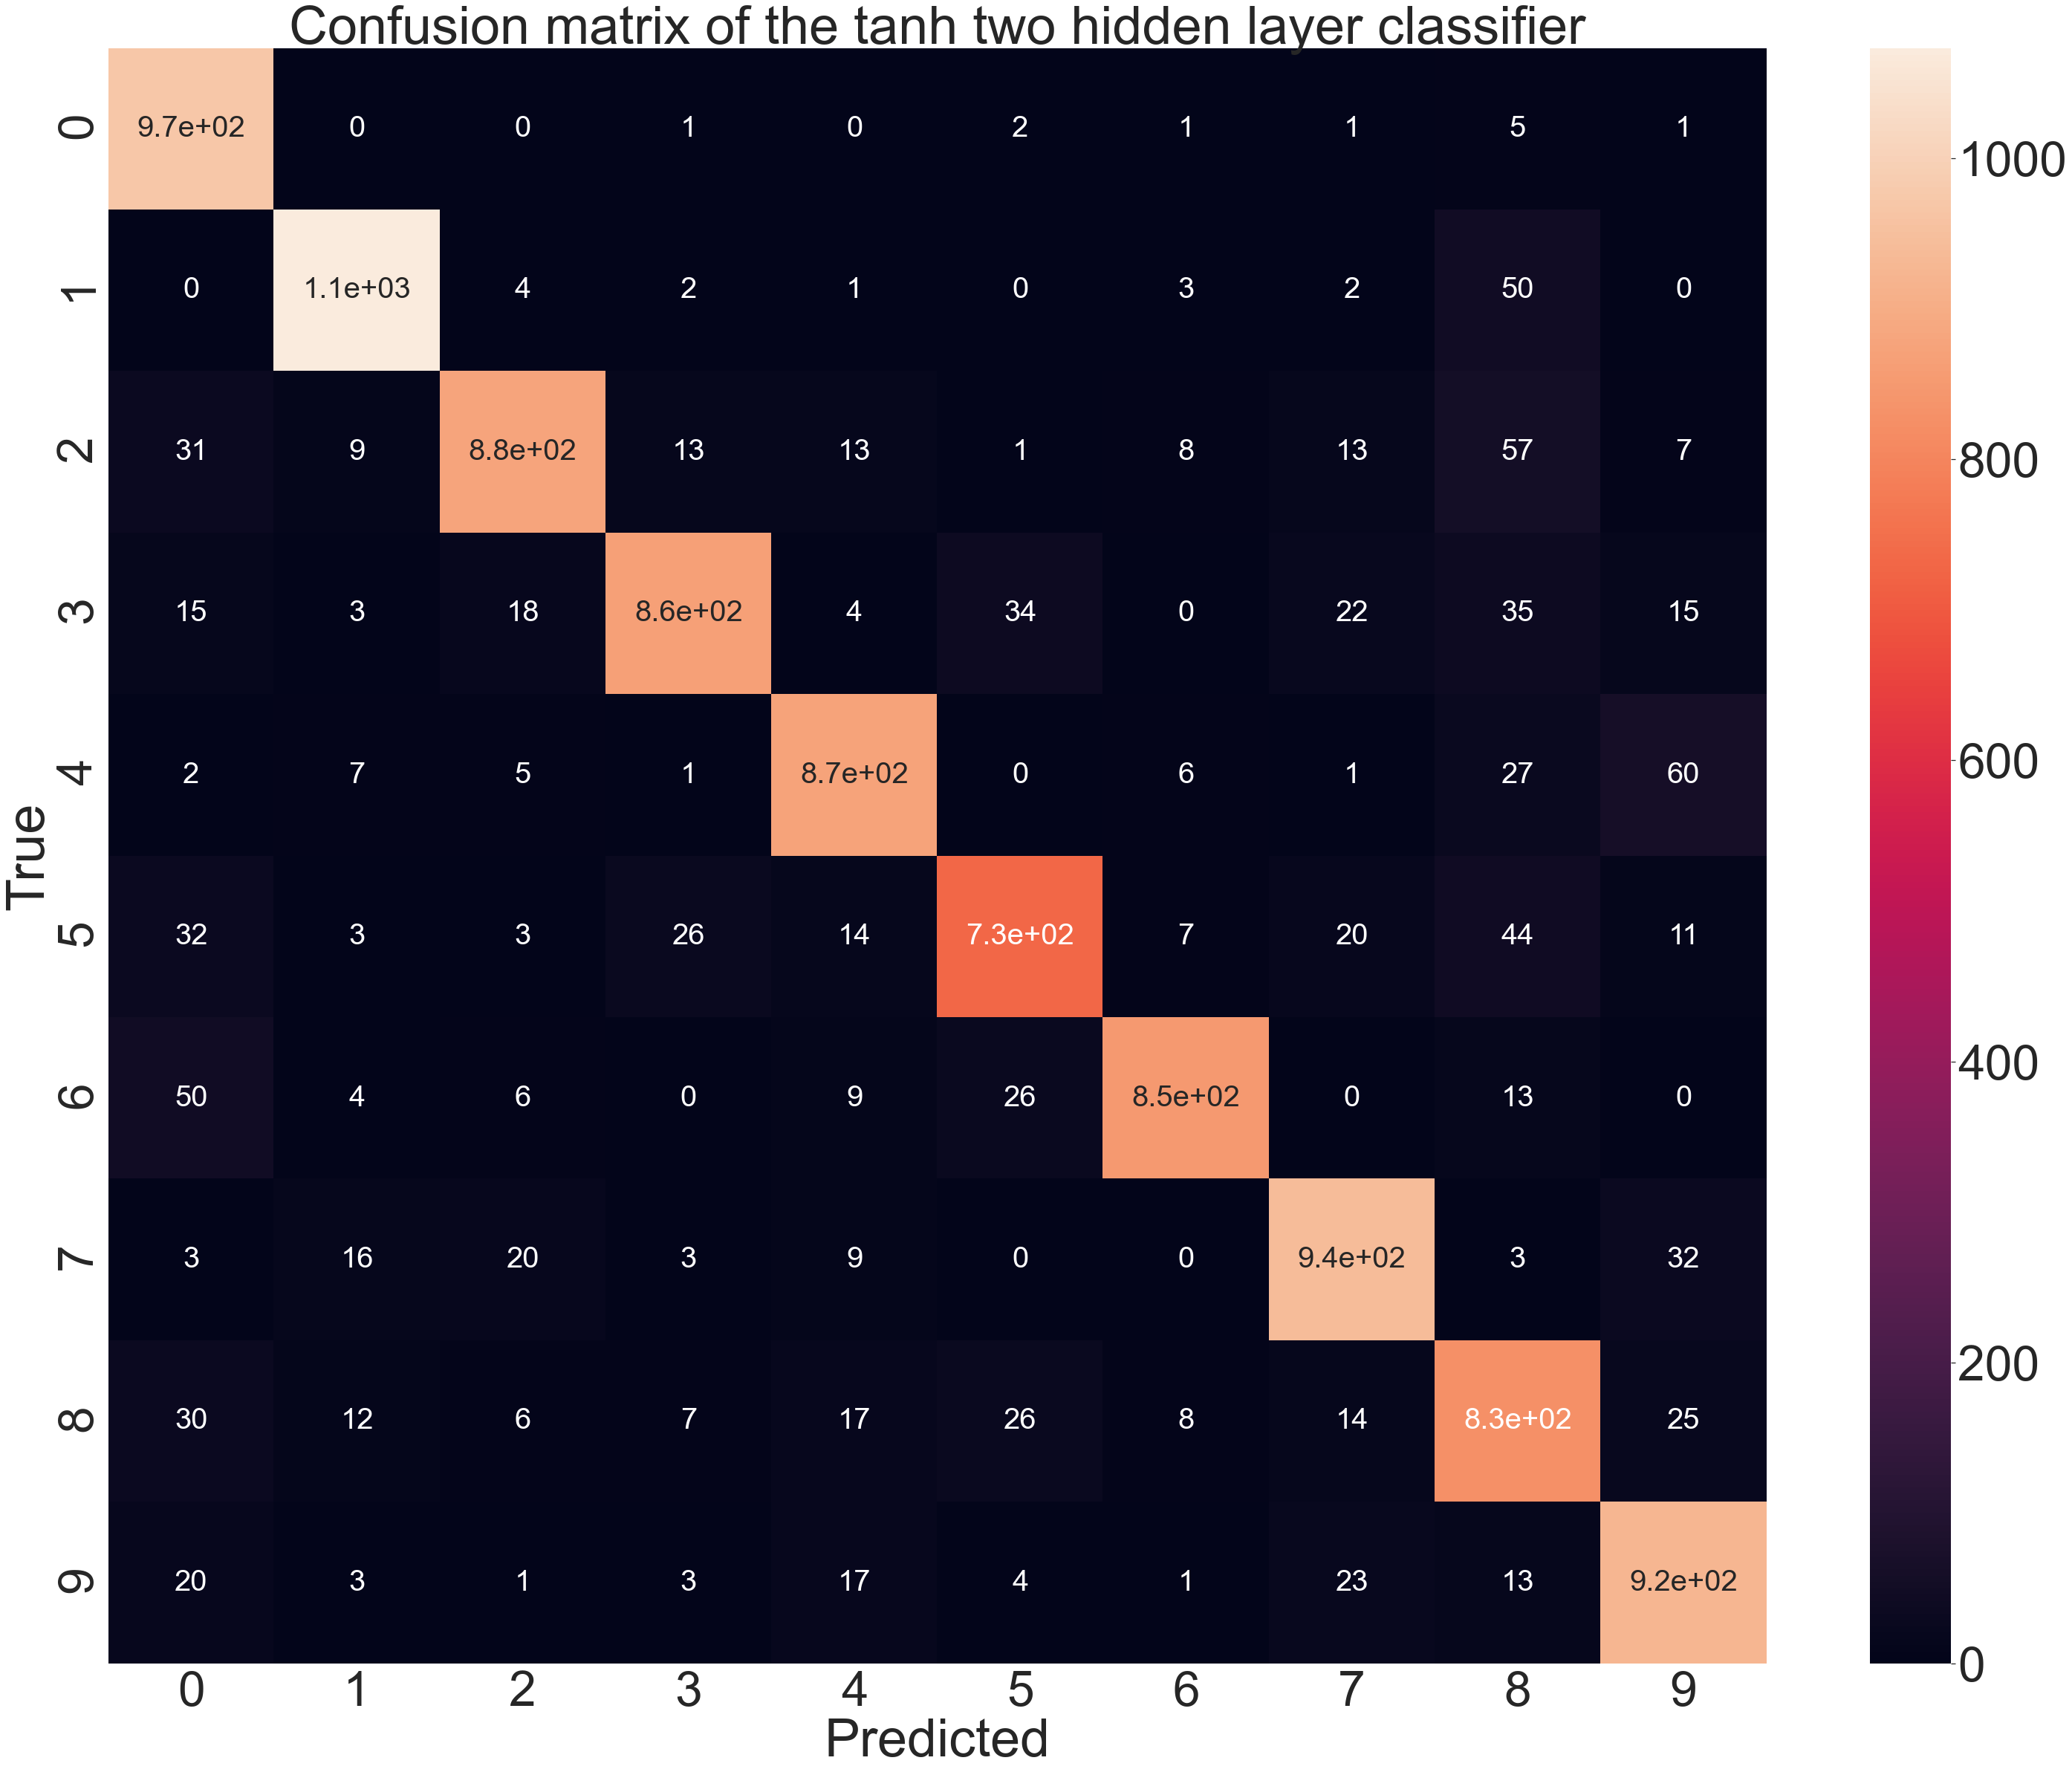

Tanh two layers: ROC AUC=0.980
[[ 969    0    0    1    0    2    1    1    5    1]
 [   0 1073    4    2    1    0    3    2   50    0]
 [  31    9  880   13   13    1    8   13   57    7]
 [  15    3   18  864    4   34    0   22   35   15]
 [   2    7    5    1  873    0    6    1   27   60]
 [  32    3    3   26   14  732    7   20   44   11]
 [  50    4    6    0    9   26  850    0   13    0]
 [   3   16   20    3    9    0    0  942    3   32]
 [  30   12    6    7   17   26    8   14  829   25]
 [  20    3    1    3   17    4    1   23   13  924]]


In [26]:
df_cmTanhTwoLayers = pd.DataFrame(arrTanhTwoLayers, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cmTanhTwoLayers, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the tanh two hidden layer classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
aucTanhTwoLayers = roc_auc_score(testingLabelFinal, outputTanhTwoLayers)
# summarize scores
print('Tanh two layers: ROC AUC=%.3f' % (aucTwoLayers))

print(arrTanhTwoLayers)

Error: 0.09046242099414553 at epoch 1
Error: 0.08383328221313821 at epoch 2
Error: 0.08071792276296025 at epoch 3
Error: 0.08072285033393259 at epoch 4
Error: 0.07169022254637922 at epoch 5
Error: 0.04225568996045249 at epoch 6
Error: 0.03659315453757758 at epoch 7
Error: 0.03498902848456905 at epoch 8
Error: 0.031174106585650115 at epoch 9
Error: 0.029861964432249716 at epoch 10
Error: 0.02931329552827194 at epoch 11
Error: 0.029056690793958312 at epoch 12
Error: 0.028839064204318157 at epoch 13
Error: 0.028608043297967654 at epoch 14
Error: 0.028449484156860983 at epoch 15
Error: 0.028307748267674744 at epoch 16
Error: 0.028189405939792456 at epoch 17
Error: 0.02808845442297769 at epoch 18
Error: 0.02797971352486203 at epoch 19
Error: 0.027818306525668645 at epoch 20


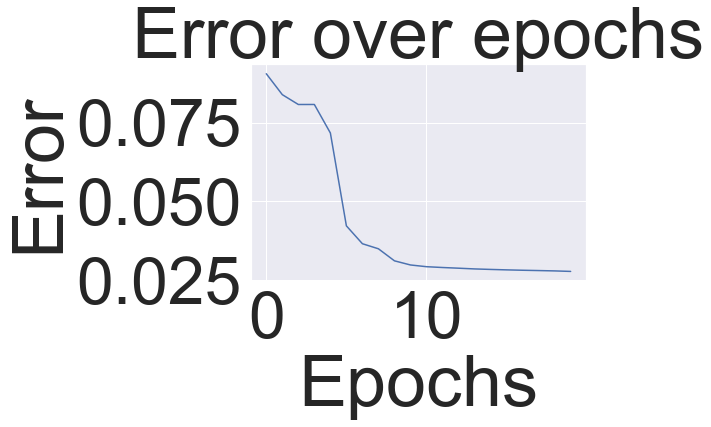

In [27]:
#neural network with 3 hidden layers, 10 neurons each layer and 10 output neurons
NNtanhThreeLayers = NeuralNetwork(training.shape[1], [10, 10, 10], 10)
#each row represents a data point and each column a feature
NNtanhThreeLayers.trainTanh(trainingNormal, trainingLableFinal,20, 0.15)

#Predicts whether the digit is 0 - 9 
outputTanhThreeLayers = NNtanhThreeLayers.feedForwardTanh(testingNormal)

print()
#getting confusion matrix
arrTanhThreeLayers = confusion_matrix(testingLabelFinal.argmax(axis=1), outputTanhThreeLayers.argmax(axis=1))

In [28]:
accuracyValueTanhThreeLayers = accuracy(testingLabelFinal,outputTanhThreeLayers)
print("Accuracy: {} %".format(accuracyValueTanhThreeLayers))

Accuracy: 89.83 %


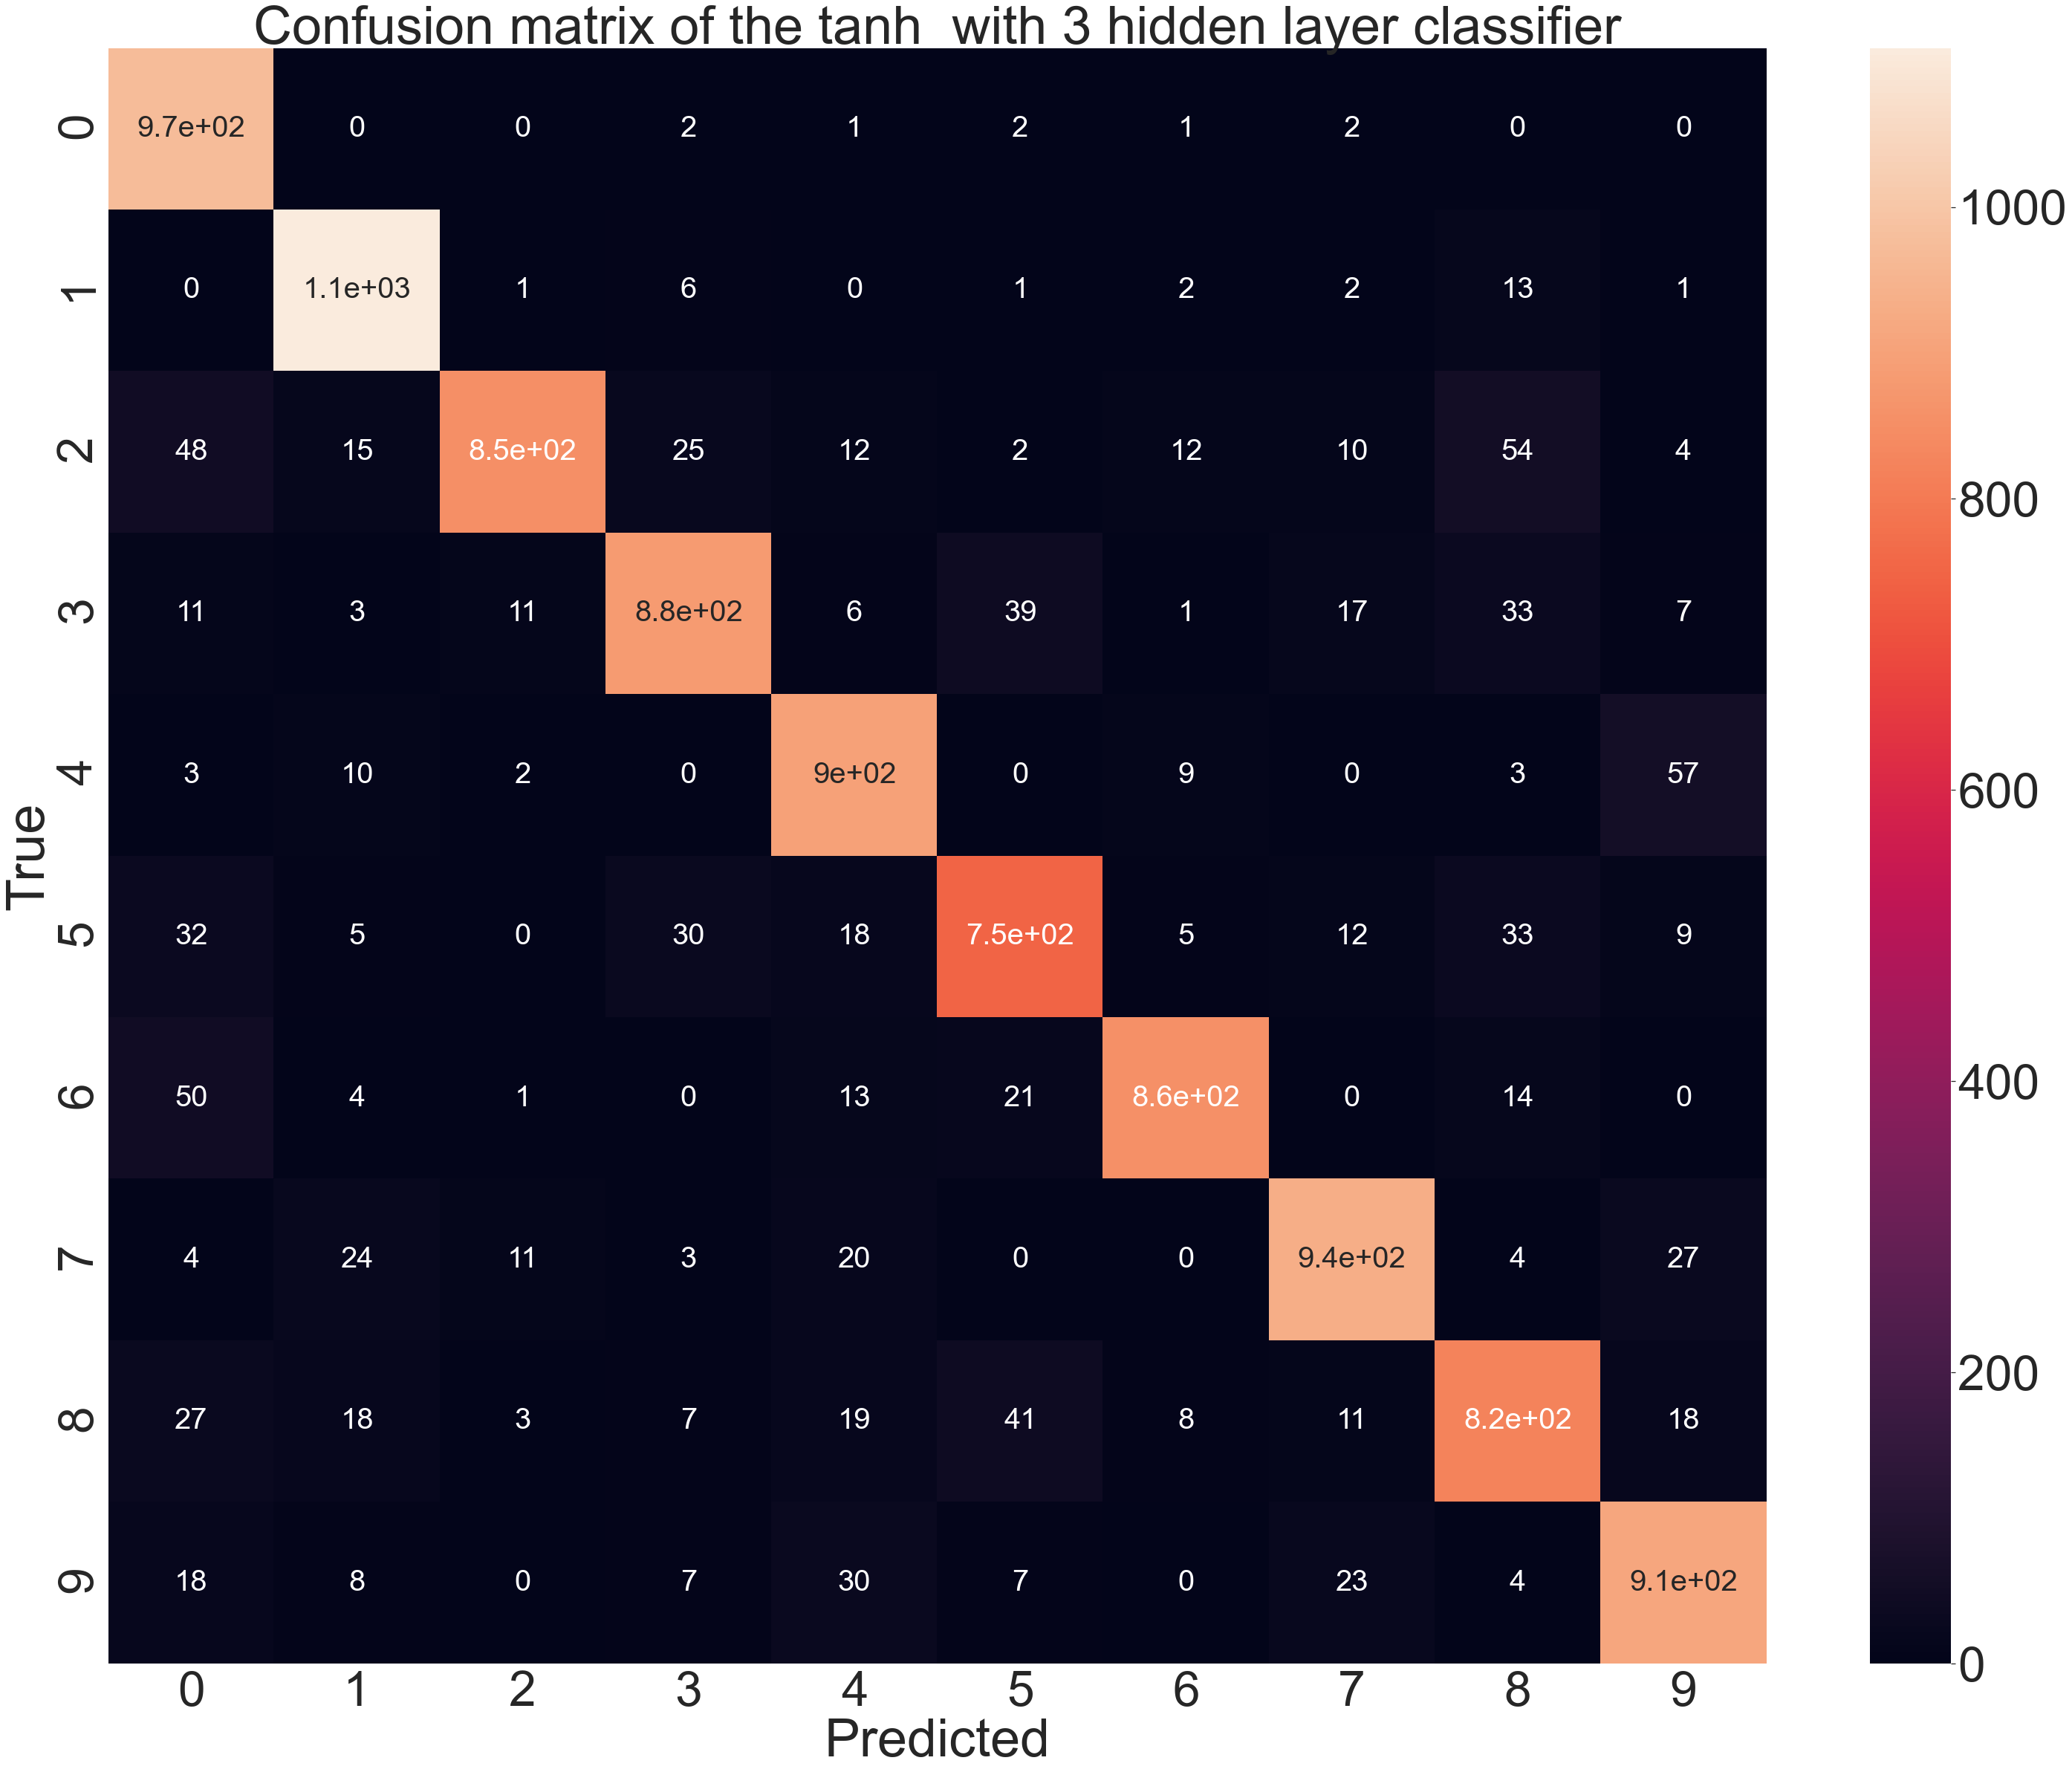

Tanh three layers: ROC AUC=0.986
[[ 972    0    0    2    1    2    1    2    0    0]
 [   0 1109    1    6    0    1    2    2   13    1]
 [  48   15  850   25   12    2   12   10   54    4]
 [  11    3   11  882    6   39    1   17   33    7]
 [   3   10    2    0  898    0    9    0    3   57]
 [  32    5    0   30   18  748    5   12   33    9]
 [  50    4    1    0   13   21  855    0   14    0]
 [   4   24   11    3   20    0    0  935    4   27]
 [  27   18    3    7   19   41    8   11  822   18]
 [  18    8    0    7   30    7    0   23    4  912]]


In [29]:
df_cmTanhThreeLayers = pd.DataFrame(arrTanhThreeLayers, range(10), range(10))
plt.figure(figsize = (50,40))
sn.set(font_scale=6) # for label size
sn.heatmap(df_cmTanhThreeLayers, annot=True, annot_kws={"size": 40}) # font size
plt.title('Confusion matrix of the tanh  with 3 hidden layer classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

aucTanhThreeLayers = roc_auc_score(testingLabelFinal, outputTanhThreeLayers)
# summarize scores
print('Tanh three layers: ROC AUC=%.3f' % (aucTanhThreeLayers))

print(arrTanhThreeLayers)